In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from pylab import rcParams
rcParams['figure.figsize']= 20, 5

In [2]:
train = pd.read_csv("D:\\Data_sets\\house-prices-advanced-regression-techniques\\train.csv")

In [3]:
train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1            Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2            Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3            Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4            Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
...          ...       ...       ...       ...          ...        ...   
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0          Norm     1Fam     2Story            7            5       2003   
1          Norm     1Fam     1Story            6            8       1976   
2          Norm     1Fam     2Story            7            5       2001   
3          Norm     1Fam     2Story            7            5       1915   
4          Norm     1Fam     2Story            8            5       2000   
...         ...      ...        ...          ...          ...        ...   
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1             1976     Gable  CompShg     MetalSd     MetalSd       None   
2             2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3             1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
...            ...       ...      ...         ...         ...        ...   
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0          196.0        Gd        TA      PConc       Gd       TA   
1            0.0        TA        TA     CBlock       Gd       TA   
2          162.0        Gd        TA      PConc       Gd       TA   
3            0.0        TA        TA     BrkTil       TA       Gd   

In [4]:
train.shape

(1460, 81)

In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_df = pd.DataFrame({'column_name': train.columns,'percent_missing': percent_missing})

In [8]:
missing_value_df[missing_value_df.percent_missing > 50]

column_name  percent_missing
Alley              Alley        93.767123
PoolQC            PoolQC        99.520548
Fence              Fence        80.753425
MiscFeature  MiscFeature        96.301370

<AxesSubplot:>

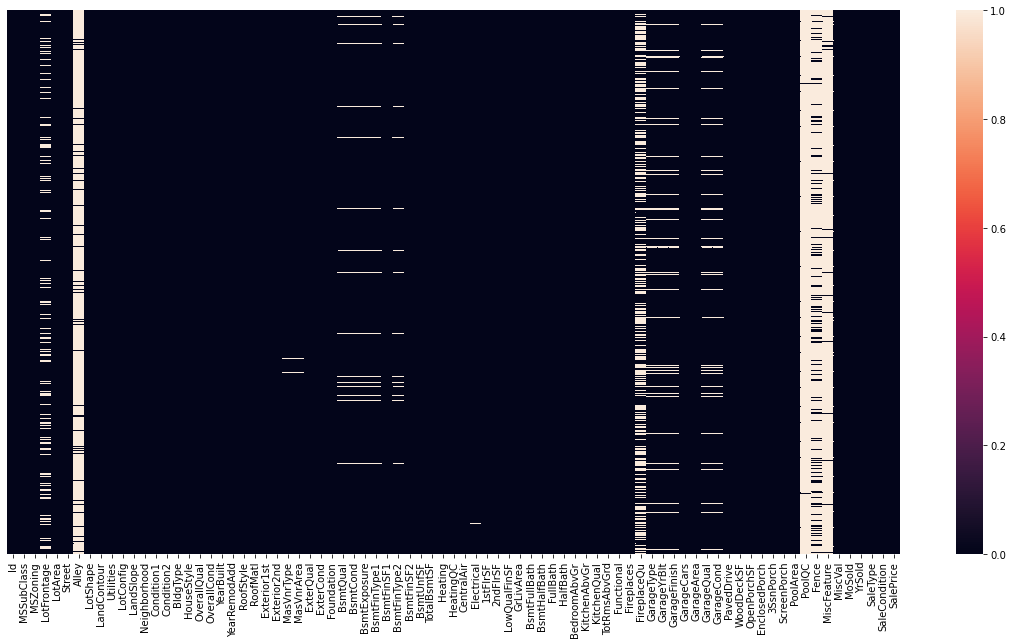

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(train.isnull(), yticklabels=False)

### Id

In [10]:
train.drop('Id', axis=1, inplace=True)

### MSSubClass: Identifies the type of dwelling involved in the sale

In [11]:
train.MSSubClass.isnull().sum() * 100 / len(train)

0.0

In [12]:
train.MSSubClass.dtype

dtype('int64')

In [13]:
train.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

Text(0.5, 1.0, 'MSSubClass')

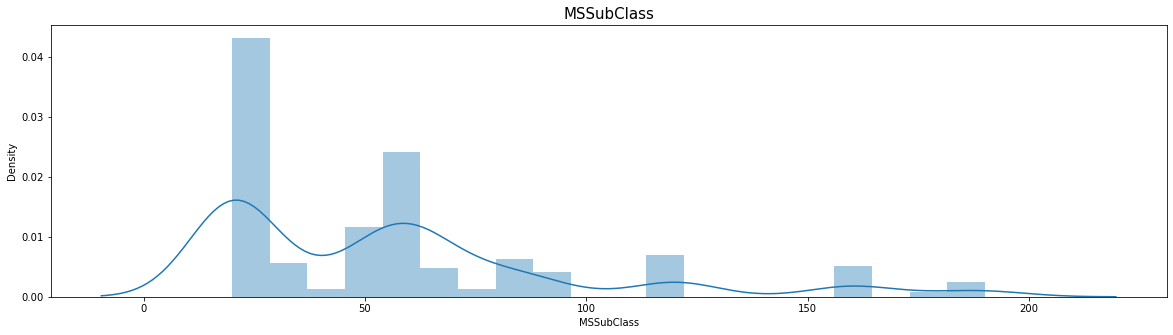

In [14]:
sns.distplot(train.MSSubClass, kde=True)
plt.title("MSSubClass", fontsize=15)

Text(0.5, 1.0, 'MSSubClass vs SalePrice')

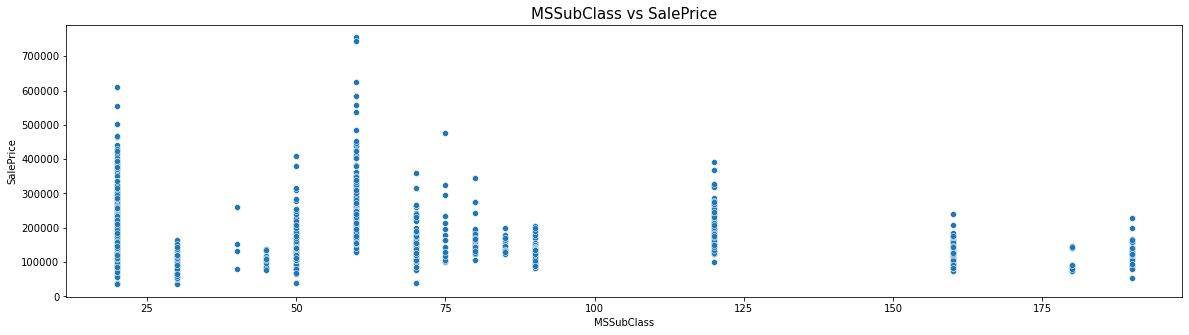

In [15]:
sns.scatterplot(x=train.MSSubClass,y=train.SalePrice)
plt.title("MSSubClass vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'MSSubClass vs SalePrice')

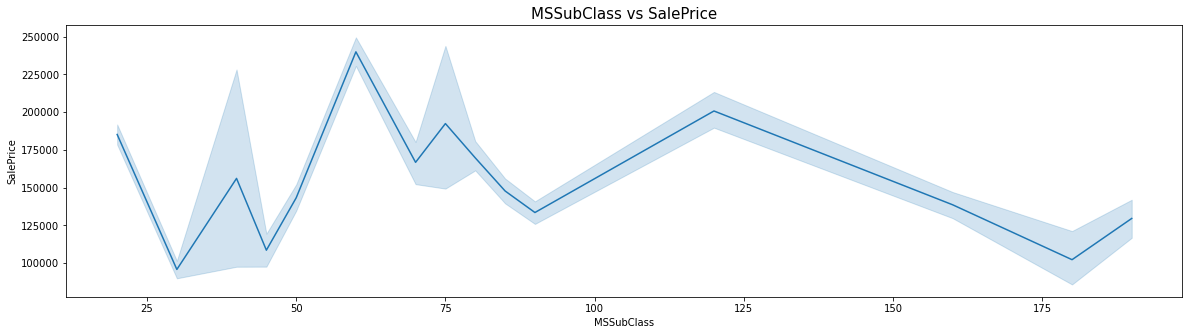

In [16]:
sns.lineplot(x=train.MSSubClass,y=train.SalePrice)
plt.title("MSSubClass vs SalePrice", fontsize=15)

### MSZoning: Identifies the general zoning classification of the sale

In [17]:
train.MSZoning.isnull().sum() * 100 / len(train)

0.0

In [18]:
train.MSZoning.dtype

dtype('O')

In [19]:
train.MSZoning.value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Text(0.5, 1.0, 'MSZoning vs SalePrice')

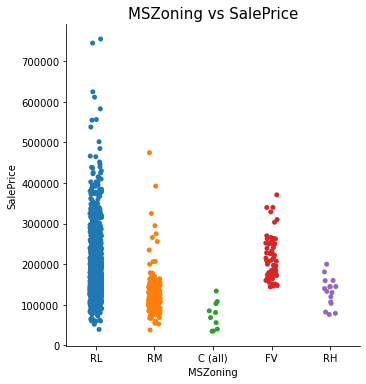

In [20]:
sns.catplot(x=train.MSZoning,y=train.SalePrice, data=train)
plt.title("MSZoning vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'MSZoning vs SalePrice')

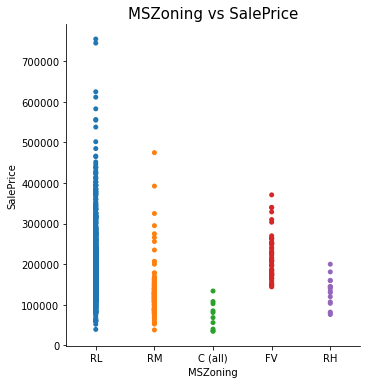

In [21]:
sns.catplot(x=train.MSZoning,y=train.SalePrice,jitter=False, data=train)
plt.title("MSZoning vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'MSZoning vs SalePrice')

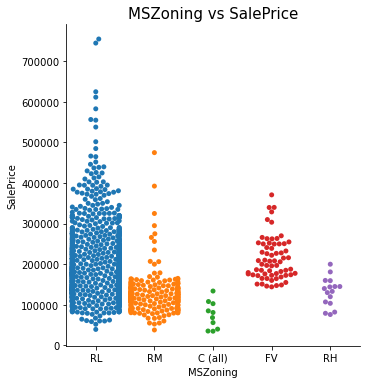

In [22]:
sns.catplot(x=train.MSZoning,y=train.SalePrice,kind="swarm", data=train)
plt.title("MSZoning vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'MSZoning vs SalePrice')

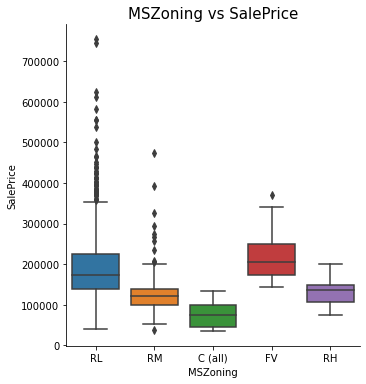

In [23]:
sns.catplot(x=train.MSZoning,y=train.SalePrice,kind="box", data=train)
plt.title("MSZoning vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'MSZoning vs SalePrice')

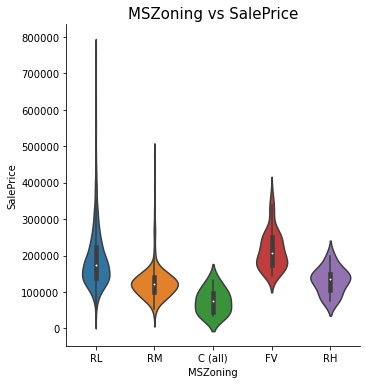

In [24]:
sns.catplot(x=train.MSZoning,y=train.SalePrice,kind="violin", data=train)
plt.title("MSZoning vs SalePrice", fontsize=15)

### LotFrontage: Linear feet of street connected to property

In [25]:
train.LotFrontage.isnull().sum() * 100 / len(train)

17.73972602739726

In [26]:
train.LotFrontage.dtype

dtype('float64')

In [27]:
train.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

Text(0.5, 1.0, 'LotFrontage vs SalePrice')

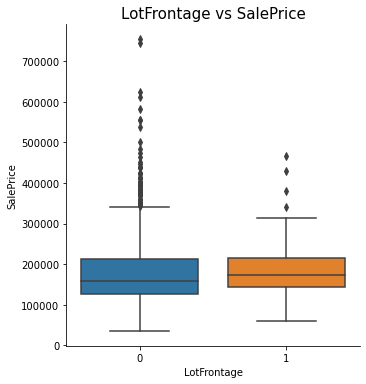

In [28]:
data = train.copy()
data.LotFrontage = np.where(data.LotFrontage.isnull(), 1,0)

sns.catplot(x=data.LotFrontage,y=train.SalePrice,kind="box", data=train)
plt.title("LotFrontage vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'LotFrontage vs SalePrice')

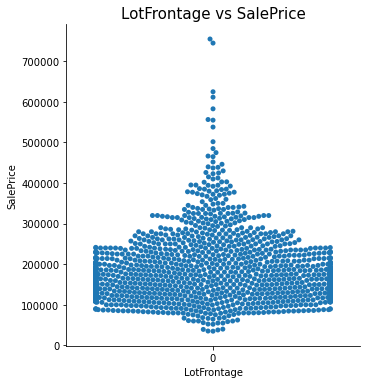

In [29]:
data.LotFrontage = np.where(data.LotFrontage.isnull(), 1,0)

sns.catplot(x=data.LotFrontage,y=train.SalePrice,kind="swarm", data=train)
plt.title("LotFrontage vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'popularity distribution')

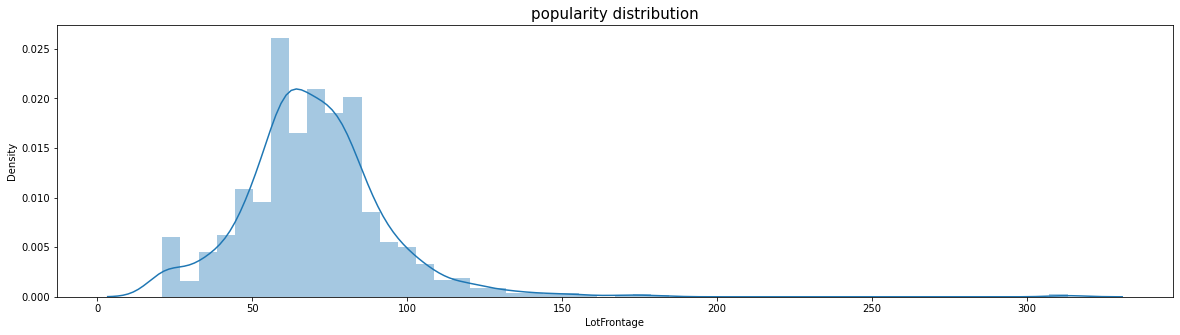

In [30]:
sns.distplot(train.LotFrontage, kde=True)
plt.title("popularity distribution", fontsize=15)

In [31]:
train.LotFrontage.mean()

70.04995836802665

In [32]:
train.LotFrontage.median()

69.0

In [33]:
train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.median())

In [34]:
train.LotFrontage.isnull().sum() 

0

### LotArea: Lot size in square feet

In [35]:
train.LotArea.isnull().sum() * 100 / len(train)

0.0

In [36]:
train.LotArea.dtype

dtype('int64')

In [37]:
train.LotArea.corr(train.SalePrice)

0.26384335387140573

Text(0.5, 1.0, 'LotArea vs SalePrice')

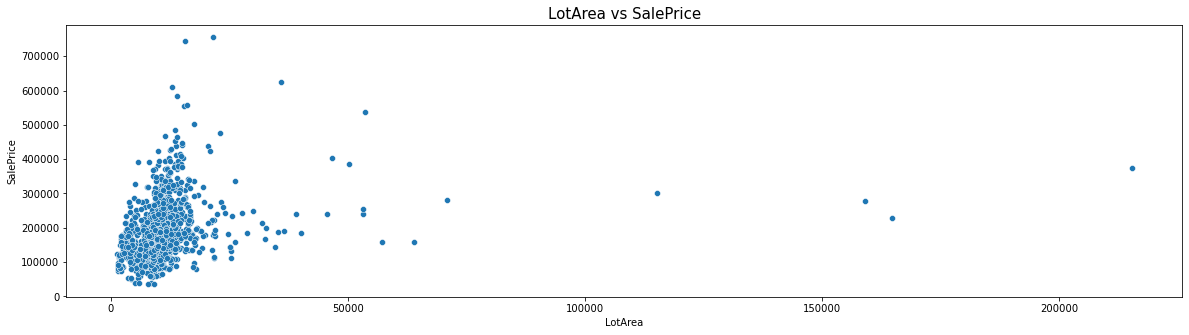

In [38]:
sns.scatterplot(x=train.LotArea,y=train.SalePrice)
plt.title("LotArea vs SalePrice", fontsize=15)

<AxesSubplot:xlabel='LotArea'>

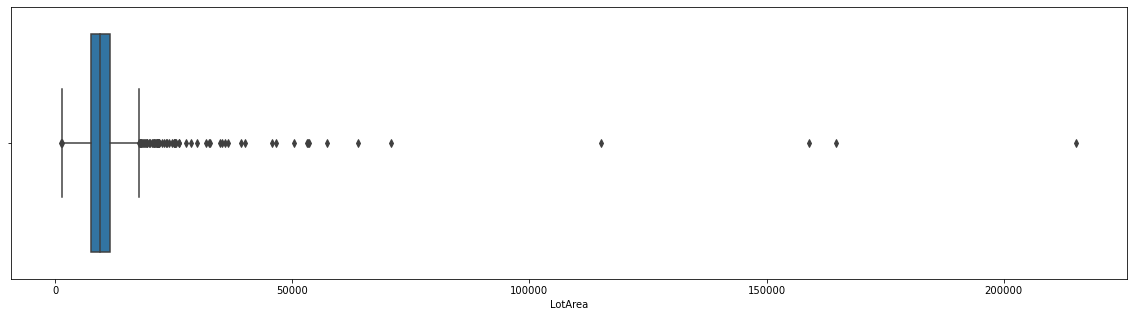

In [39]:
sns.boxplot(x=train.LotArea)

### Street: Type of road access to property

In [40]:
train.Street.isnull().sum() * 100 / len(train)

0.0

In [41]:
train.Street.dtype

dtype('O')

In [42]:
train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

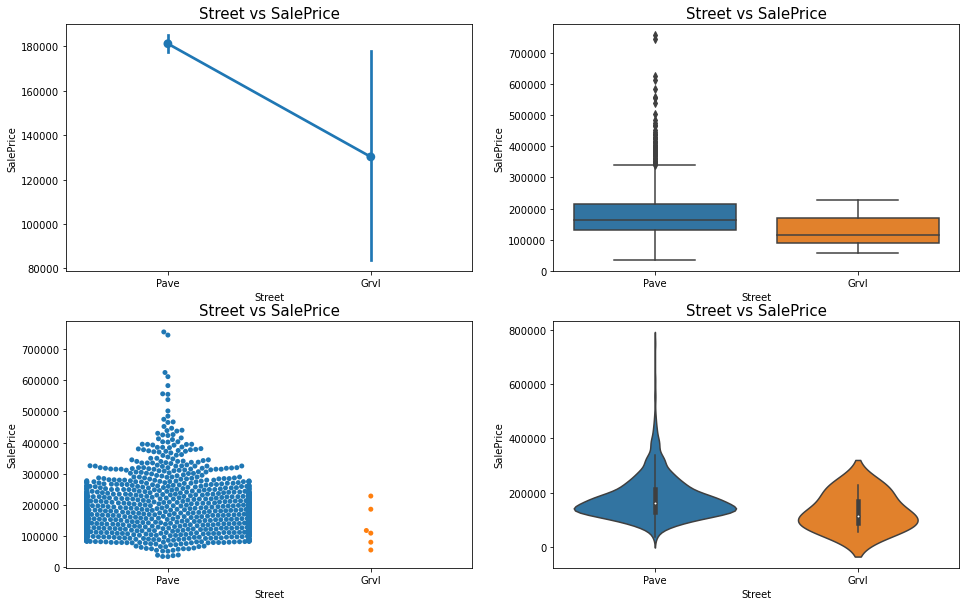

In [43]:
plt.figure(figsize=(16,10))

plt.subplot(2,2,1)
sns.pointplot(x=train.Street,y=train.SalePrice, data=train)
plt.title("Street vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train.Street,y=train.SalePrice, data=train)
plt.title("Street vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train.Street,y=train.SalePrice, data=train)
plt.title("Street vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train.Street,y=train.SalePrice, data=train)
plt.title("Street vs SalePrice", fontsize=15)

plt.show()


### Alley: Type of alley access to property

In [44]:
train.Alley.isnull().sum() * 100 / len(train)

93.76712328767124

In [45]:
train.drop('Alley', axis=1, inplace=True)

### LotShape: General shape of property

In [46]:
train.LotShape.isnull().sum() * 100 / len(train)

0.0

In [47]:
train.LotShape.dtype

dtype('O')

In [48]:
train.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

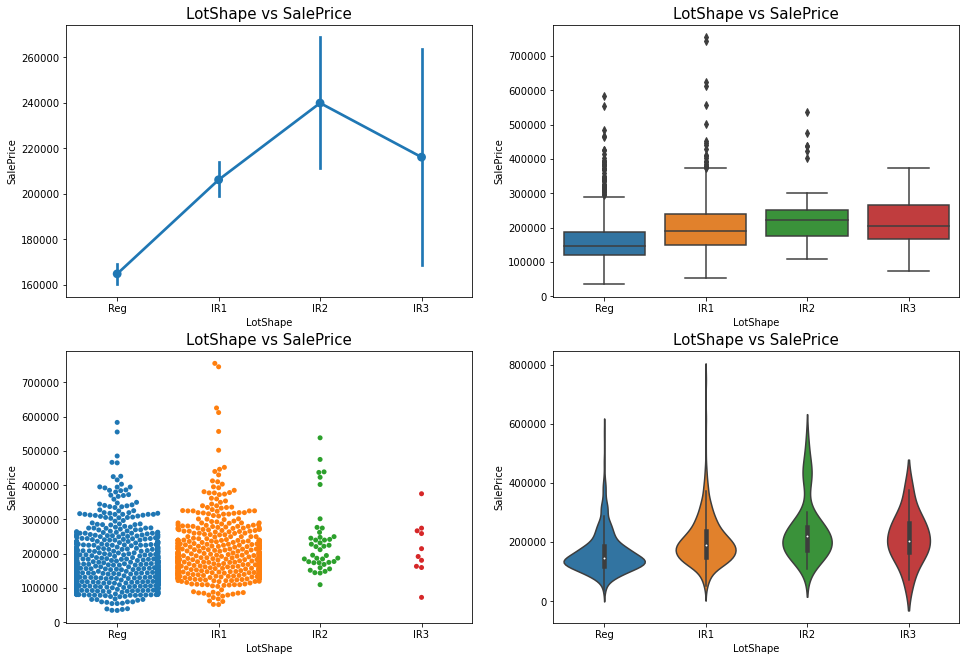

In [49]:
feature_name = 'LotShape'

plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### LandContour: Flatness of the property

In [50]:
train.LandContour.isnull().sum() * 100 / len(train)

0.0

In [51]:
train.LandContour.dtype

dtype('O')

In [52]:
train.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

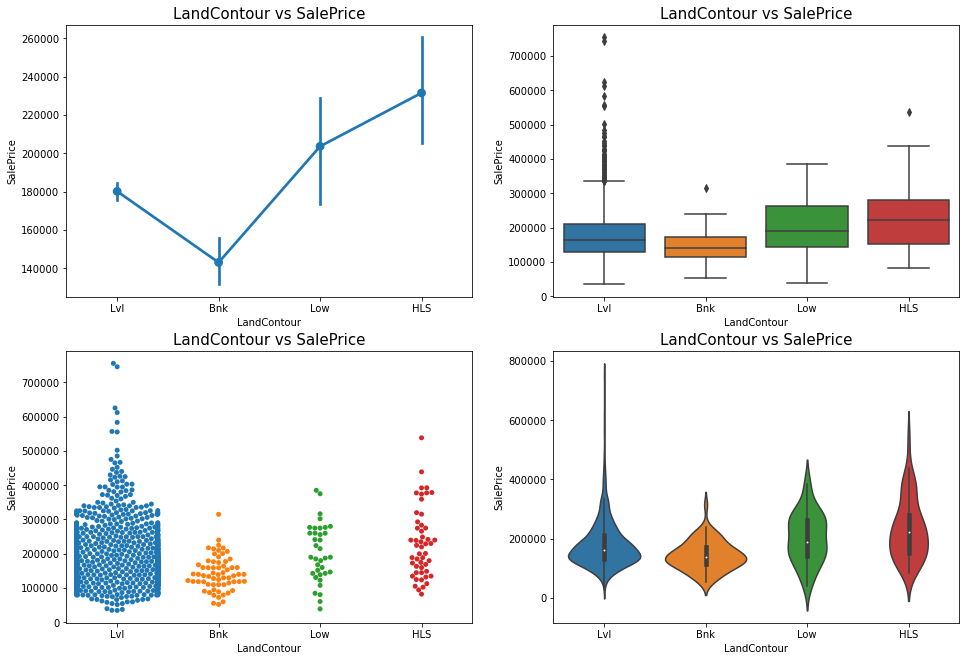

In [53]:
feature_name = 'LandContour'

plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Utilities: Type of utilities available

In [54]:
train.Utilities.isnull().sum() * 100 / len(train)

0.0

In [55]:
train.Utilities.dtype

dtype('O')

In [56]:
train.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

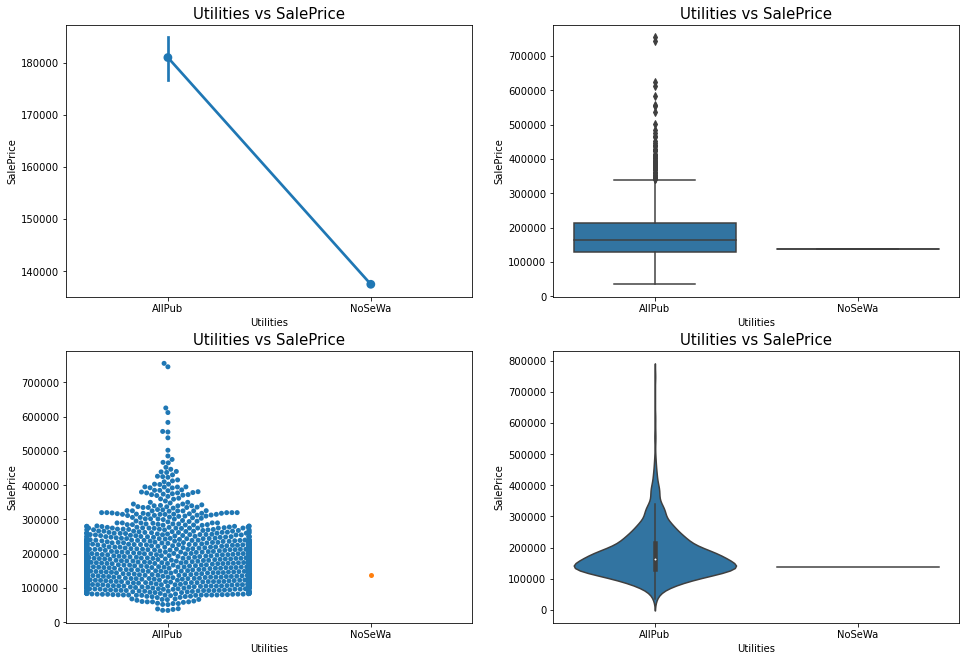

In [57]:
feature_name = 'Utilities'

plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### LotConfig: Lot configuration

In [58]:
train.LotConfig.isnull().sum() * 100 / len(train)

0.0

In [59]:
train.LotConfig.dtype

dtype('O')

In [60]:
train.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

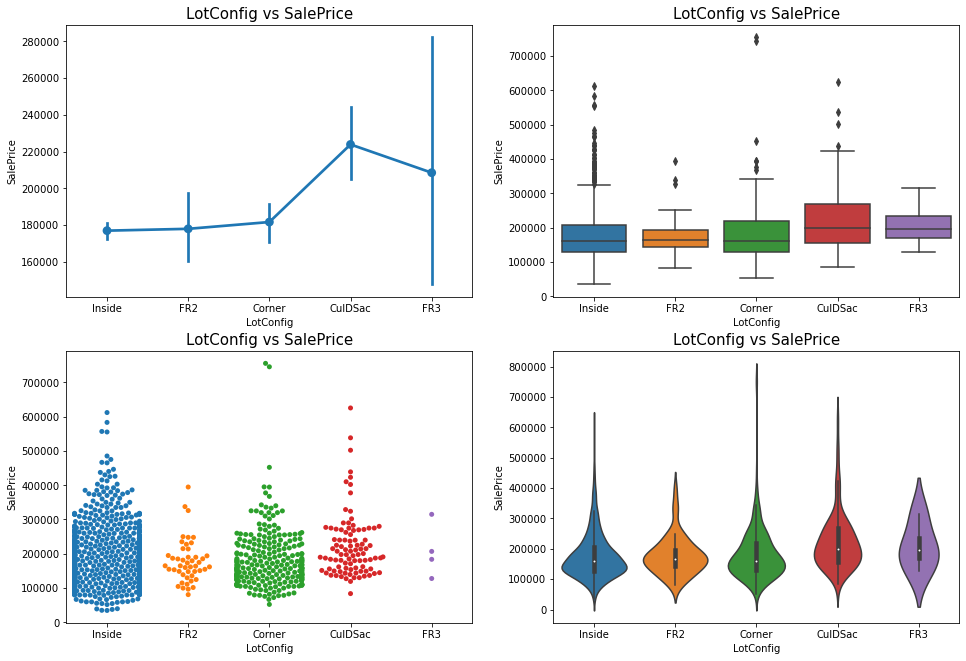

In [61]:
feature_name = 'LotConfig'

plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### LandSlope: Slope of property

In [62]:
train.LandSlope.isnull().sum() * 100 / len(train)

0.0

In [63]:
train.LandSlope.dtype

dtype('O')

In [64]:
train.LandSlope.value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

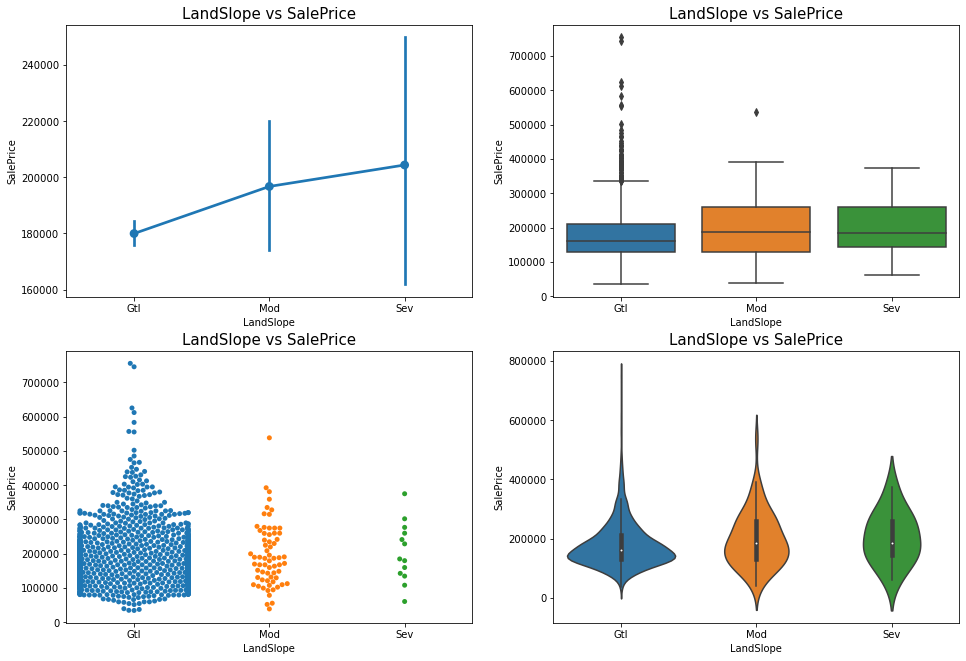

In [65]:
feature_name = 'LandSlope'

plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Neighborhood: Physical locations within Ames city limits

In [66]:
train.Neighborhood.isnull().sum() * 100 / len(train)

0.0

In [67]:
train.Neighborhood.dtype

dtype('O')

In [68]:
train.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

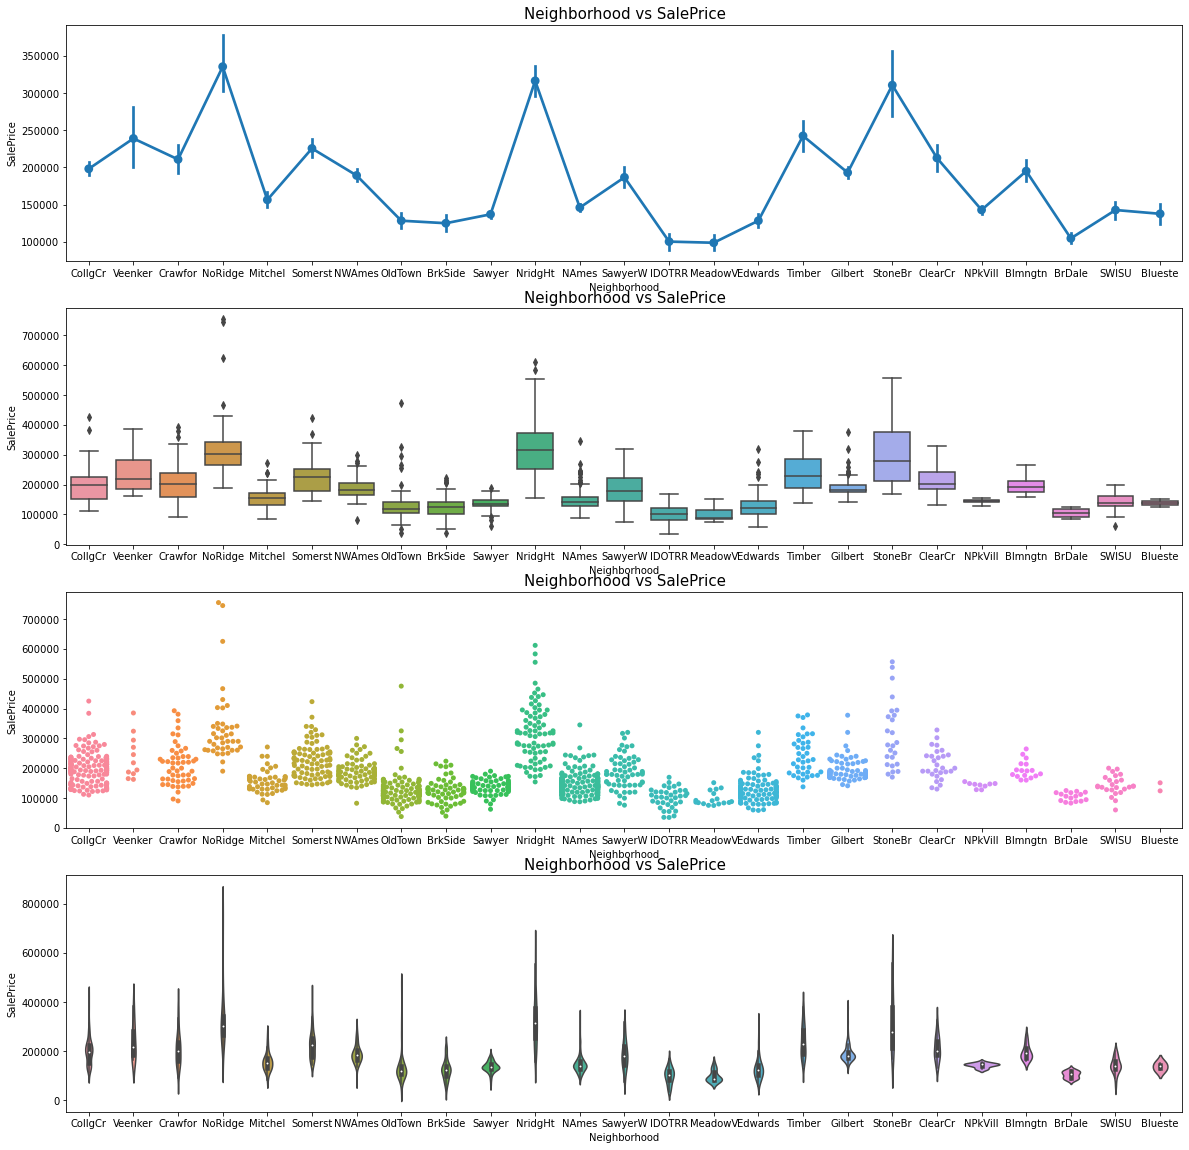

In [69]:
feature_name = 'Neighborhood'

plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Condition1: Proximity to various conditions

In [70]:
train.Condition1.isnull().sum() * 100 / len(train)

0.0

In [71]:
train.Condition1.dtype

dtype('O')

In [72]:
train.Condition1.value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

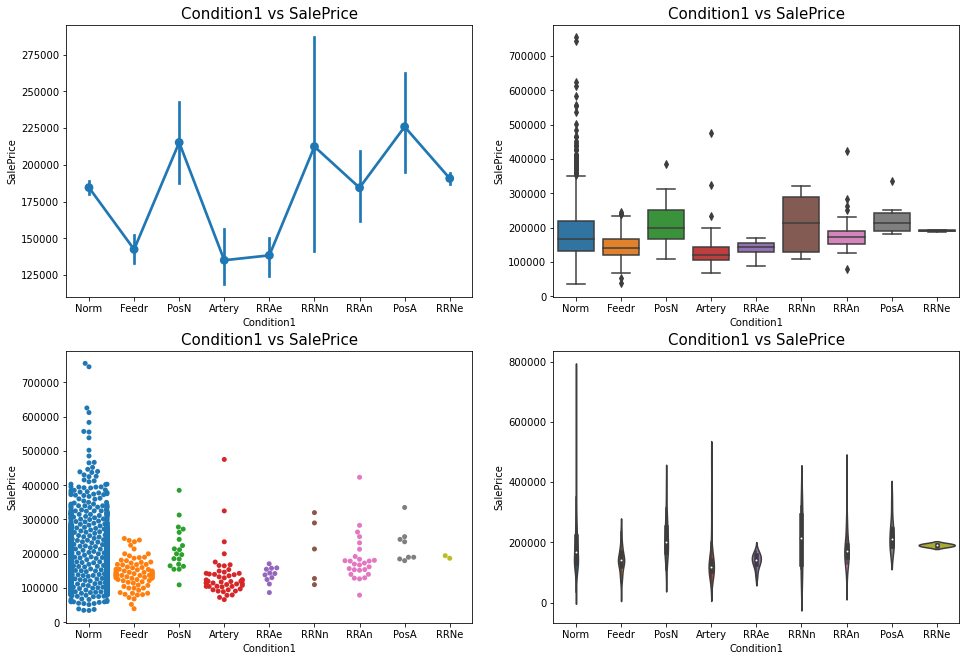

In [73]:
feature_name = 'Condition1'

plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Condition2: Proximity to various conditions (if more than one is present)

In [74]:
train.Condition2.isnull().sum() * 100 / len(train)

0.0

In [75]:
train.Condition2.dtype

dtype('O')

In [76]:
train.Condition2.value_counts()

Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAe         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64

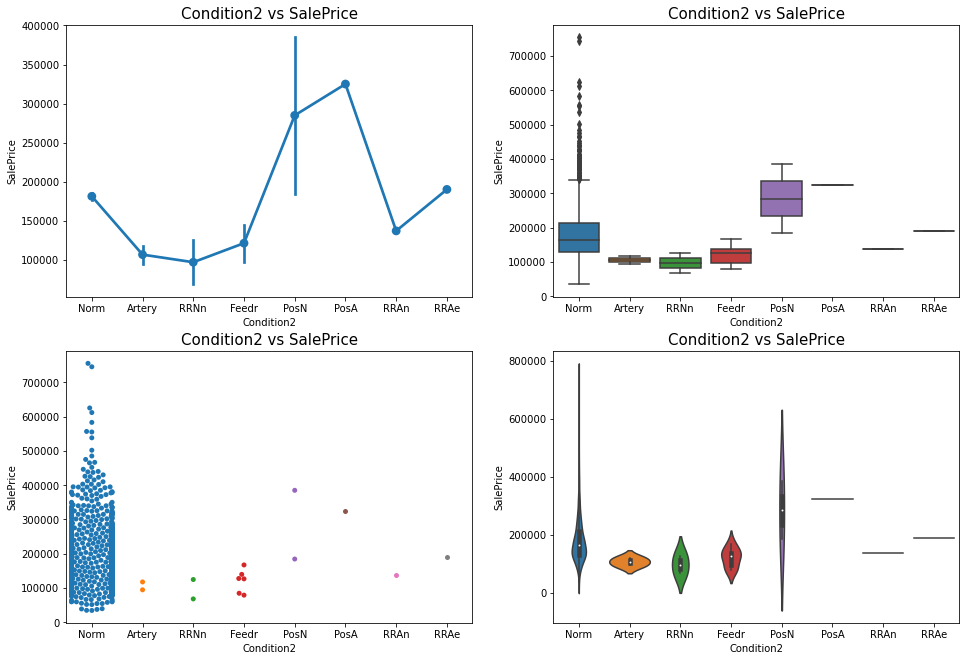

In [77]:
feature_name = 'Condition2'

plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### BldgType: Type of dwelling

In [78]:
train.BldgType.isnull().sum() * 100 / len(train)

0.0

In [79]:
train.BldgType.dtype

dtype('O')

In [80]:
train.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

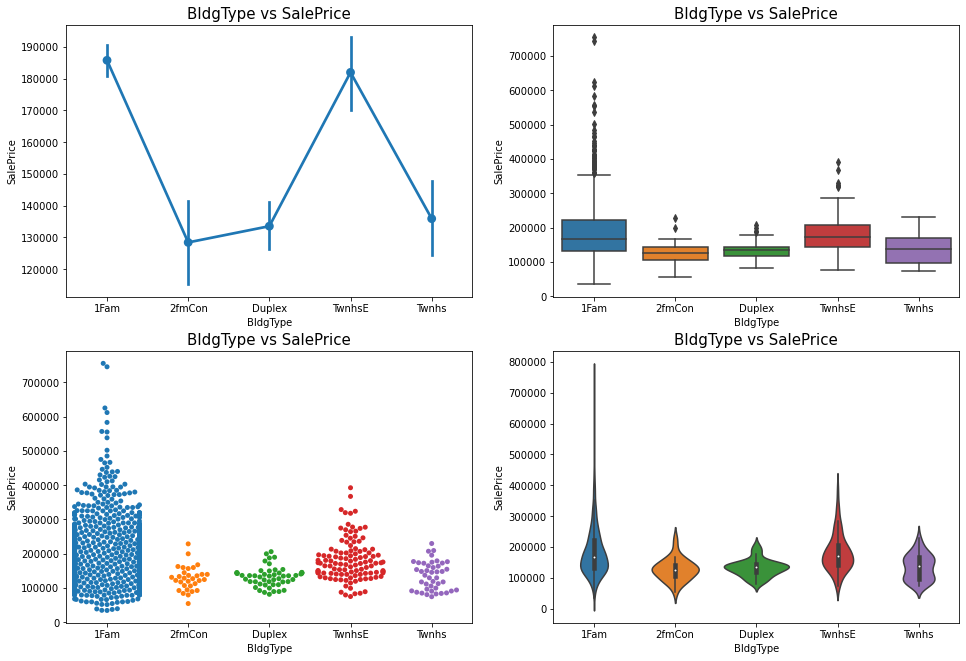

In [81]:
feature_name = 'BldgType'

plt.figure(figsize=(16,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### HouseStyle: Style of dwelling

In [82]:
train.HouseStyle.isnull().sum() * 100 / len(train)

0.0

In [83]:
train.HouseStyle.dtype

dtype('O')

In [84]:
train.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

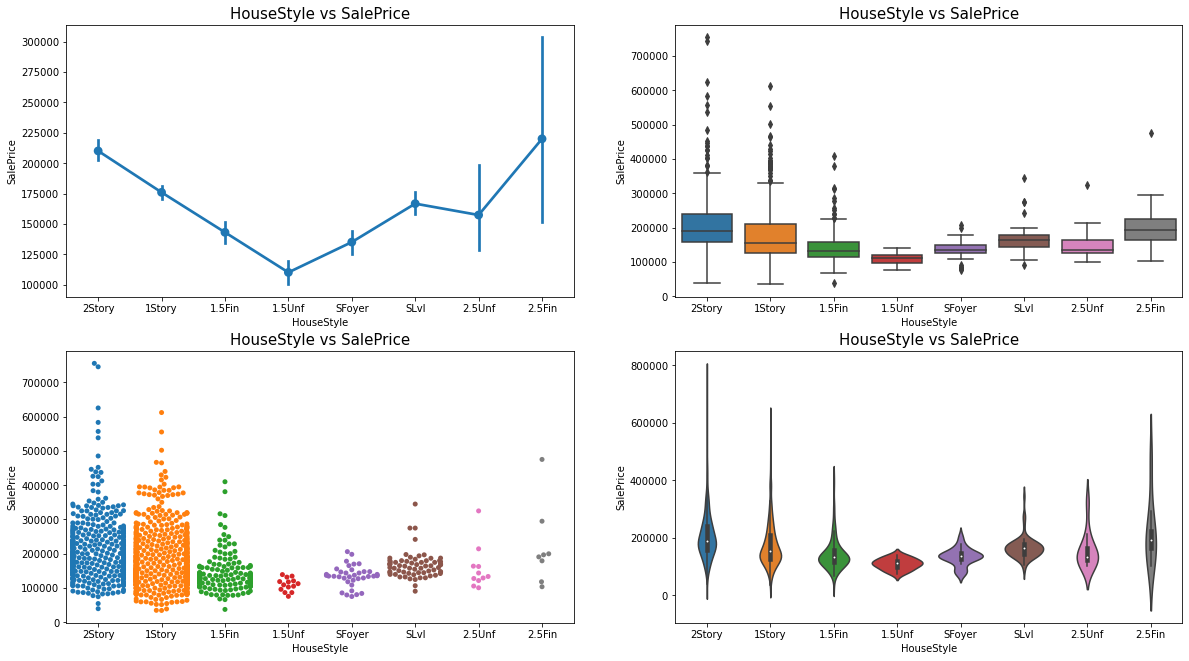

In [85]:
feature_name = 'HouseStyle'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### OverallQual: Rates the overall material and finish of the house

In [86]:
train.OverallQual.isnull().sum() * 100 / len(train)

0.0

In [87]:
train.OverallQual.dtype

dtype('int64')

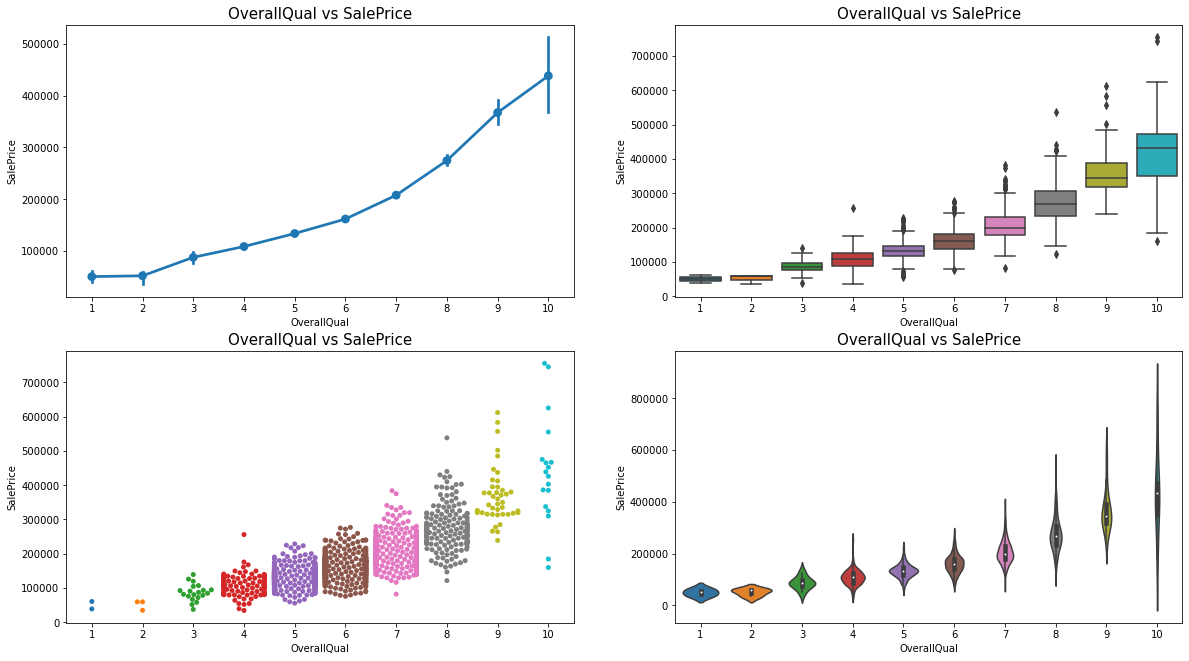

In [88]:
feature_name = 'OverallQual'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### OverallCond: Rates the overall condition of the house

In [89]:
train.OverallCond.isnull().sum() * 100 / len(train)

0.0

In [90]:
train.OverallCond.dtype

dtype('int64')

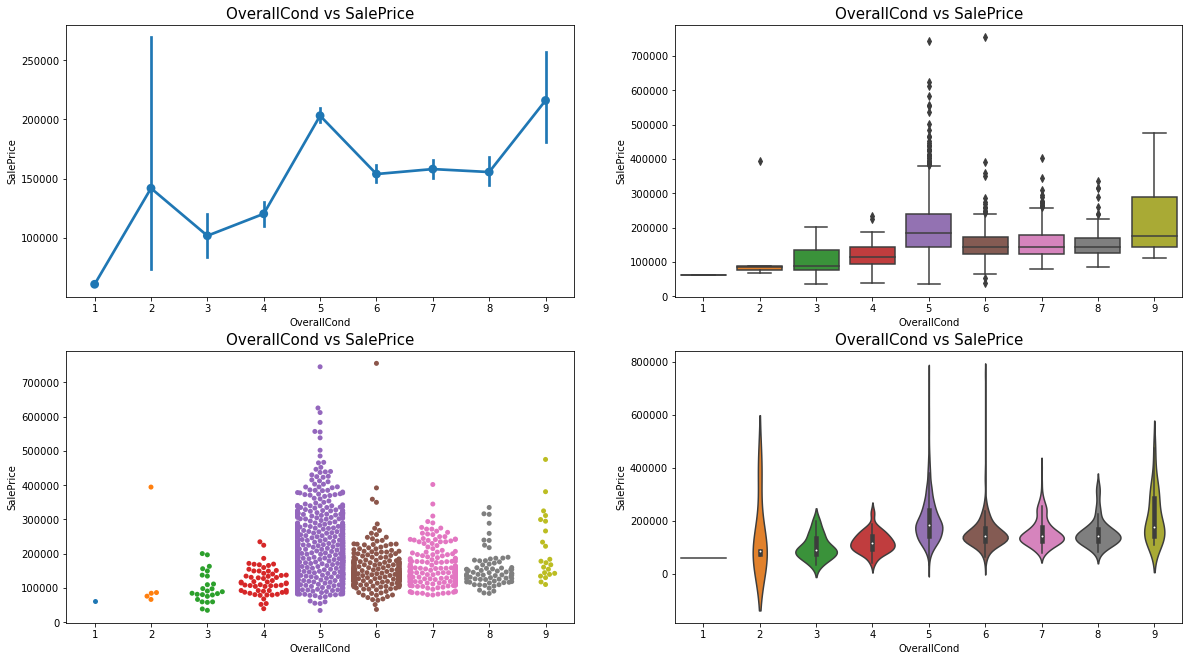

In [91]:
feature_name = 'OverallCond'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### YearBuilt: Original construction date

In [92]:
train.YearBuilt.isnull().sum() * 100 / len(train)

0.0

In [93]:
train.YearBuilt.dtype

dtype('int64')

In [94]:
train.YearBuilt.value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1904     1
1898     1
1893     1
1882     1
2010     1
Name: YearBuilt, Length: 112, dtype: int64

Text(0.5, 1.0, 'YearBuilt vs SalePrice')

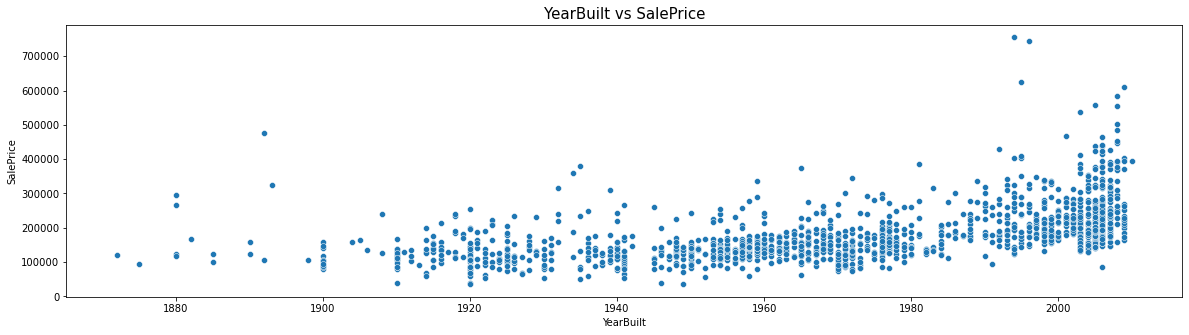

In [95]:
sns.scatterplot(x=train.YearBuilt,y=train.SalePrice)
plt.title("YearBuilt vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'YearBuilt vs SalePrice')

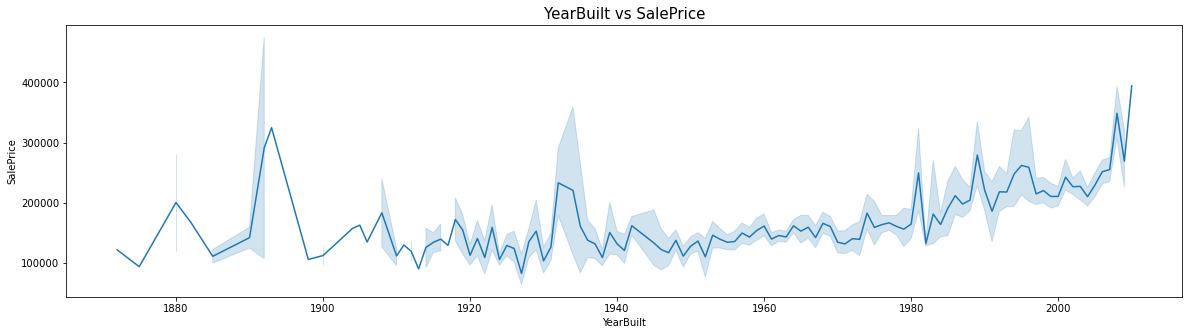

In [96]:
sns.lineplot(x=train.YearBuilt,y=train.SalePrice)
plt.title("YearBuilt vs SalePrice", fontsize=15)

### YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

In [97]:
train.YearRemodAdd.isnull().sum() * 100 / len(train)

0.0

In [98]:
train.YearRemodAdd.dtype

dtype('int64')

Text(0.5, 1.0, 'YearRemodAdd vs SalePrice')

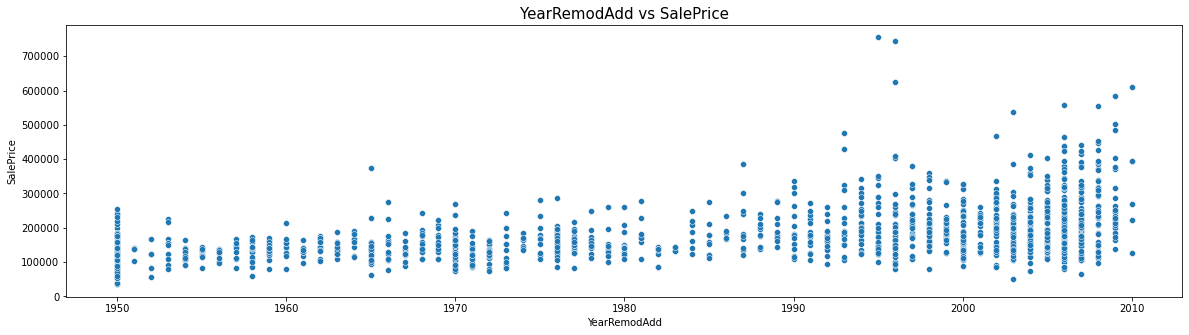

In [99]:
sns.scatterplot(x=train.YearRemodAdd,y=train.SalePrice)
plt.title("YearRemodAdd vs SalePrice", fontsize=15)

Text(0.5, 1.0, 'YearRemodAdd vs SalePrice')

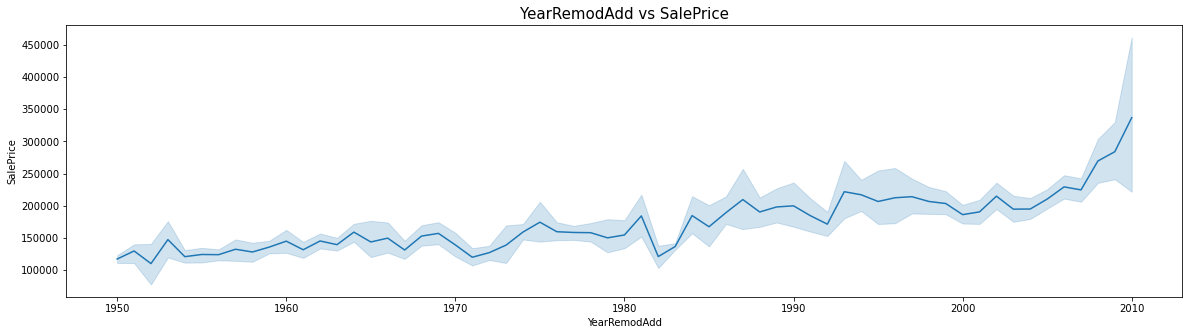

In [100]:
sns.lineplot(x=train.YearRemodAdd,y=train.SalePrice)
plt.title("YearRemodAdd vs SalePrice", fontsize=15)

### RoofStyle: Type of roof

In [101]:
train.RoofStyle.isnull().sum() * 100 / len(train)

0.0

In [102]:
train.RoofStyle.dtype

dtype('O')

In [103]:
train.RoofStyle.value_counts()

Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

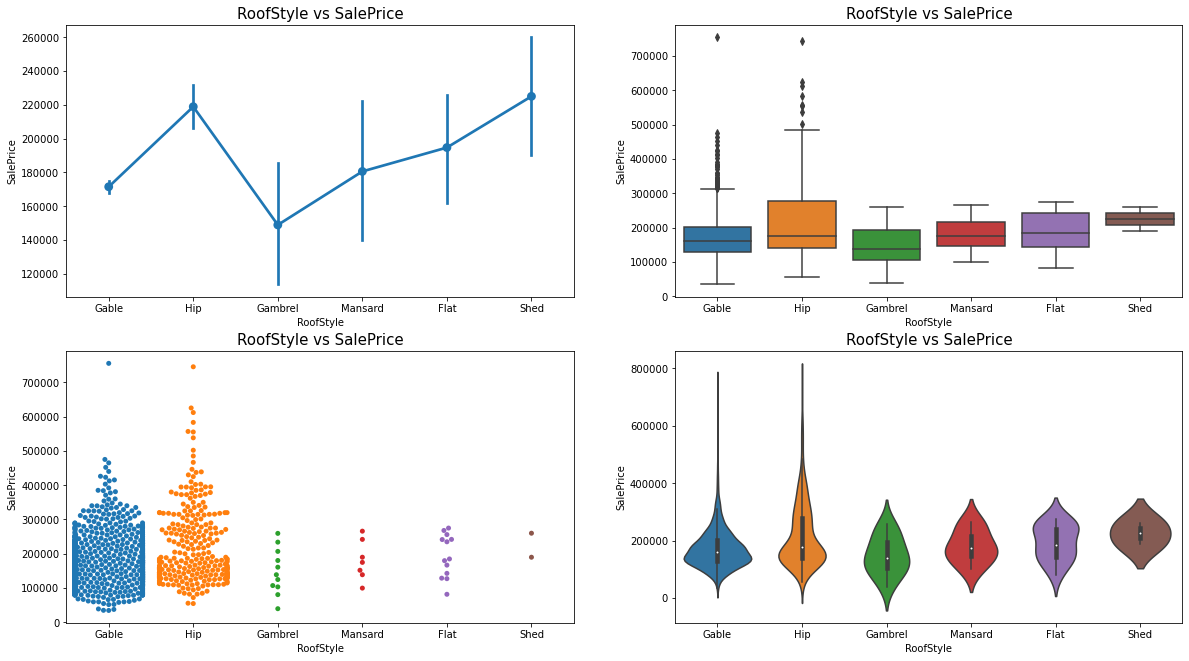

In [104]:
feature_name = 'RoofStyle'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### RoofMatl: Roof material

In [105]:
train.RoofMatl.isnull().sum() * 100 / len(train)

0.0

In [106]:
train.RoofMatl.dtype

dtype('O')

In [107]:
train.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Metal         1
ClyTile       1
Roll          1
Name: RoofMatl, dtype: int64

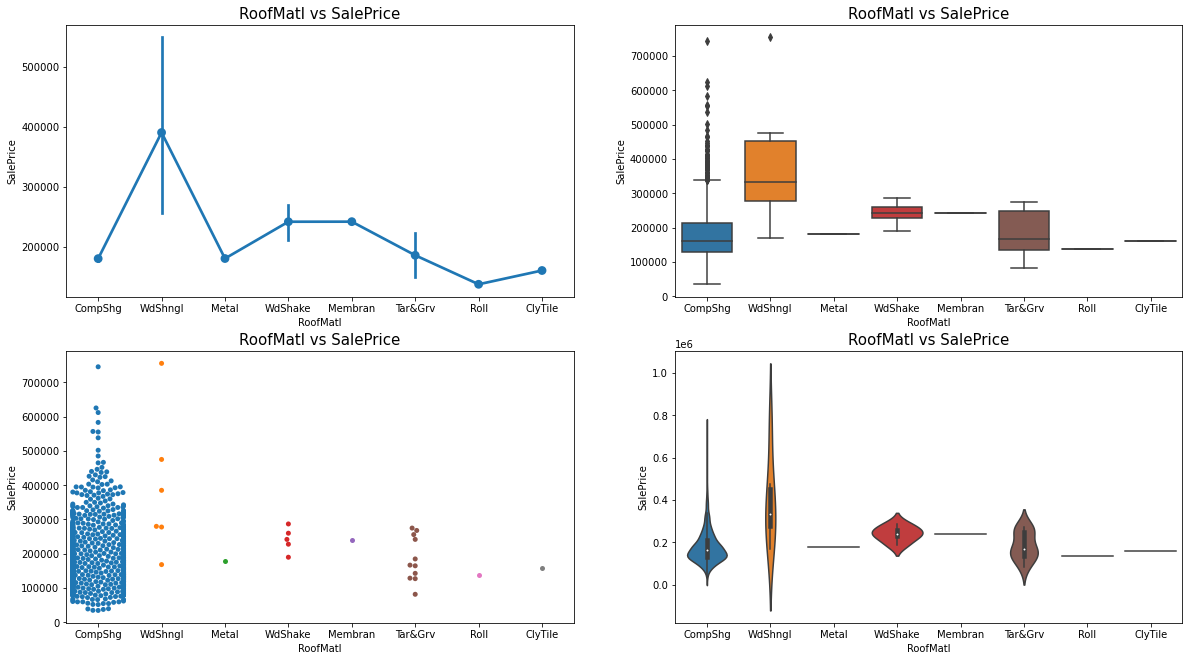

In [108]:
feature_name = 'RoofMatl'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Exterior1st: Exterior covering on house

In [109]:
train.Exterior1st.isnull().sum() * 100 / len(train)

0.0

In [110]:
train.Exterior1st.dtype

dtype('O')

In [111]:
train.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

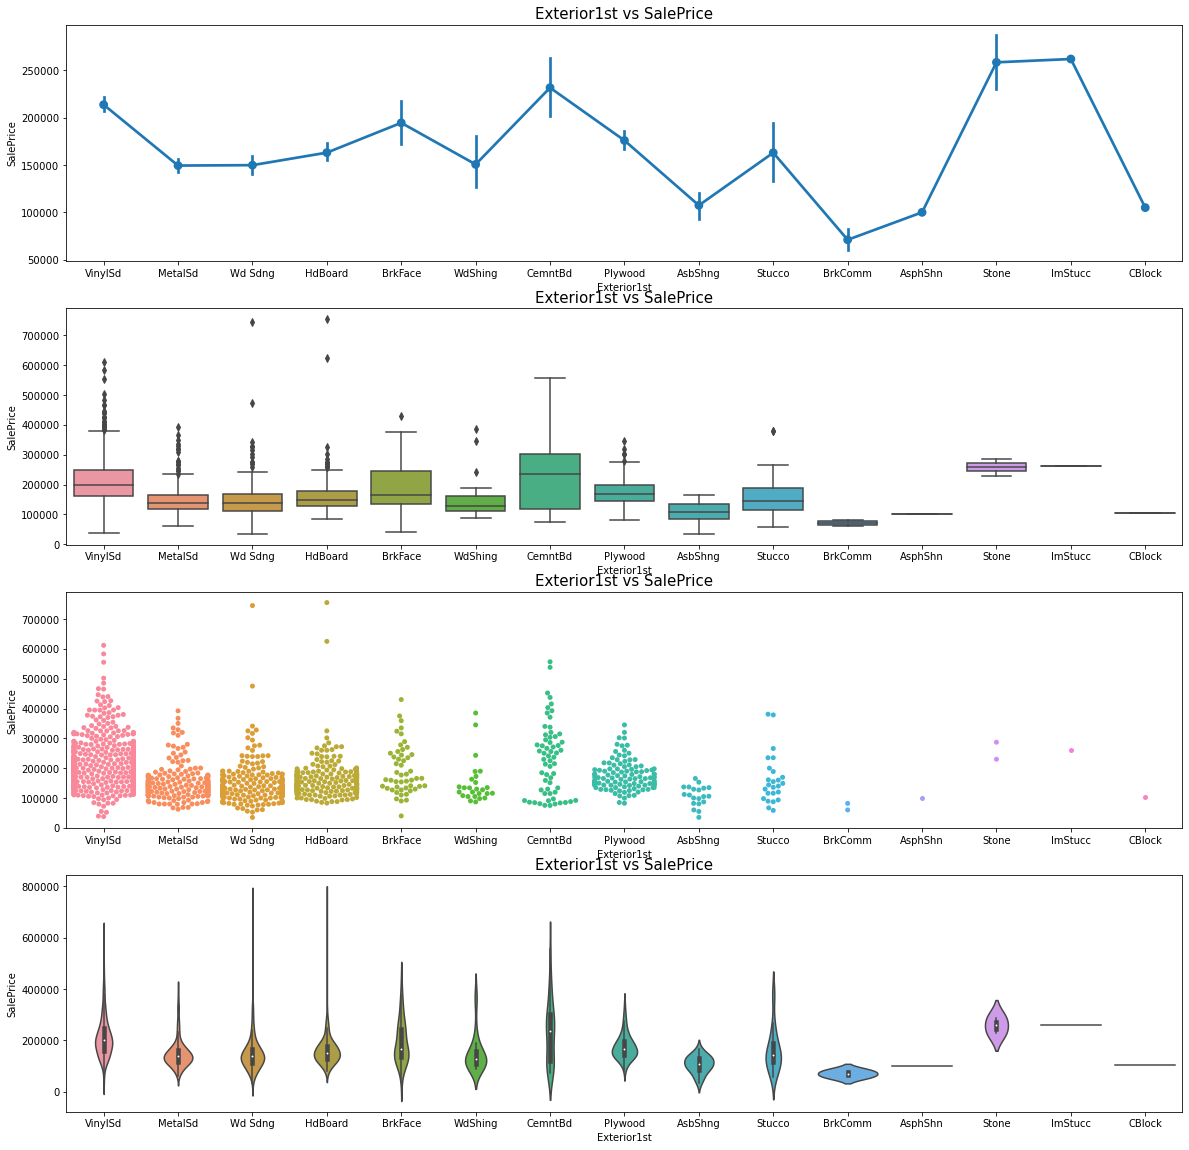

In [112]:
feature_name = 'Exterior1st'

plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Exterior2nd: Exterior covering on house (if more than one material)

In [113]:
train.Exterior2nd.isnull().sum() * 100 / len(train)

0.0

In [114]:
train.Exterior2nd.dtype

dtype('O')

In [115]:
train.Exterior2nd.value_counts()

VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

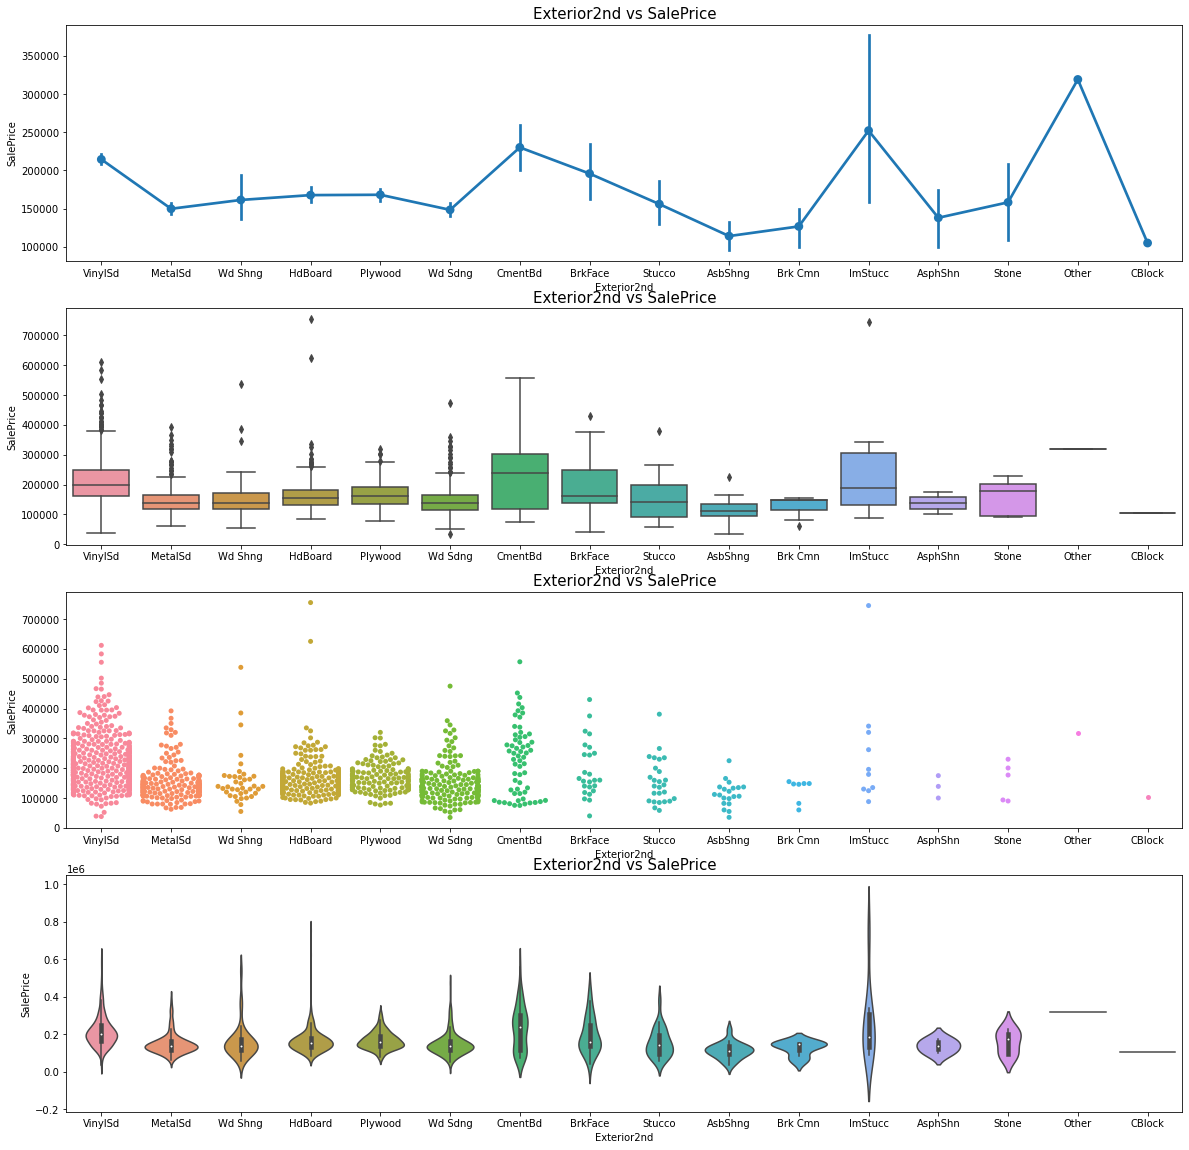

In [116]:
feature_name = 'Exterior2nd'

plt.figure(figsize=(20,20))

plt.subplot(4,1,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(4,1,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### MasVnrType: Masonry veneer type

In [117]:
train.MasVnrType.isnull().sum() * 100 / len(train)

0.547945205479452

In [118]:
train.MasVnrType.dtype

dtype('O')

In [119]:
train.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [120]:
# train.MasVnrType = train.MasVnrType.apply(lambda x: None if x=="None" else x)

In [121]:
train.MasVnrType.isnull().sum()

8

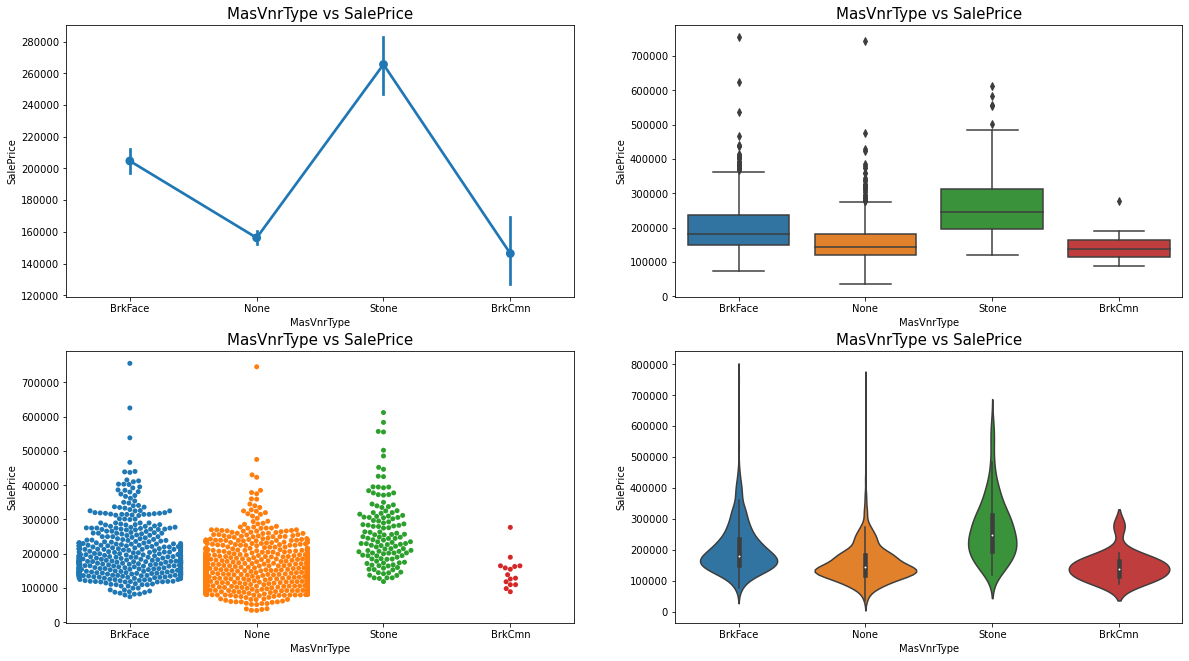

In [122]:
feature_name = 'MasVnrType'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


In [123]:
train.MasVnrType = train.MasVnrType.fillna(train.MasVnrType.mode()[0])

### MasVnrArea: Masonry veneer area in square feet

In [124]:
train.MasVnrArea.isnull().sum() * 100 / len(train)

0.547945205479452

In [125]:
train.MasVnrArea.dtype

dtype('float64')

In [126]:
data.MasVnrArea = np.where(data.MasVnrArea.isnull(), 1,0)

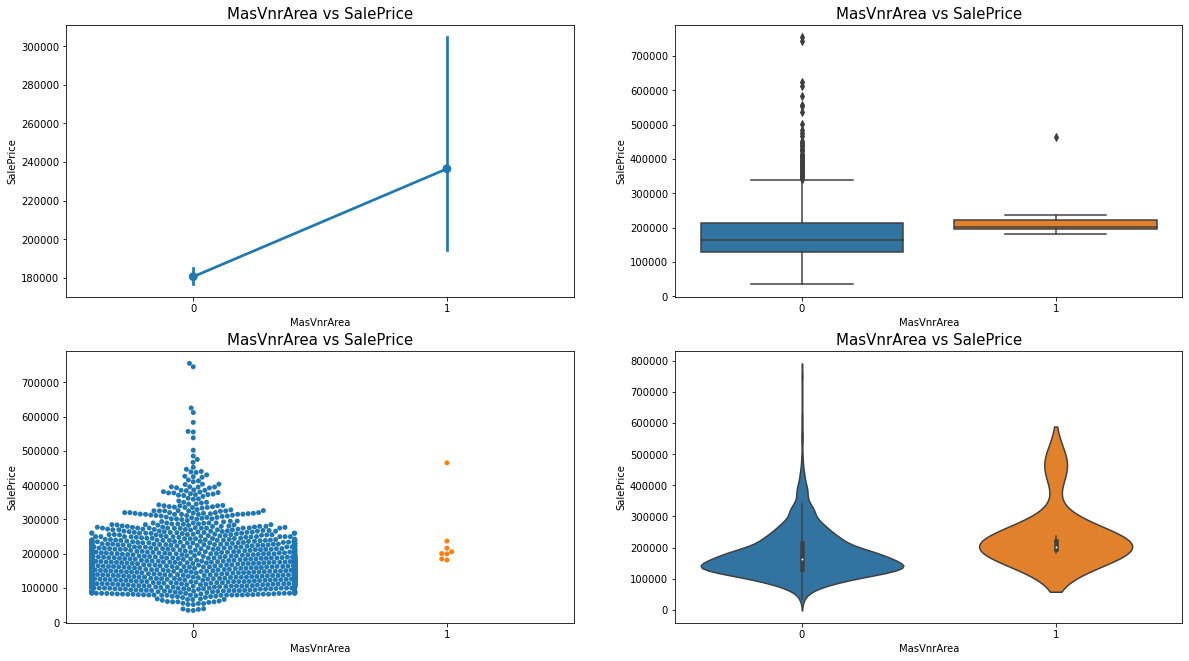

In [127]:
feature_name = 'MasVnrArea'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=data[feature_name],y=data.SalePrice, data=data)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=data[feature_name],y=data.SalePrice, data=data)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=data[feature_name],y=data.SalePrice, data=data)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=data[feature_name],y=data.SalePrice, data=data)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


Text(0.5, 1.0, 'MasVnrArea distribution')

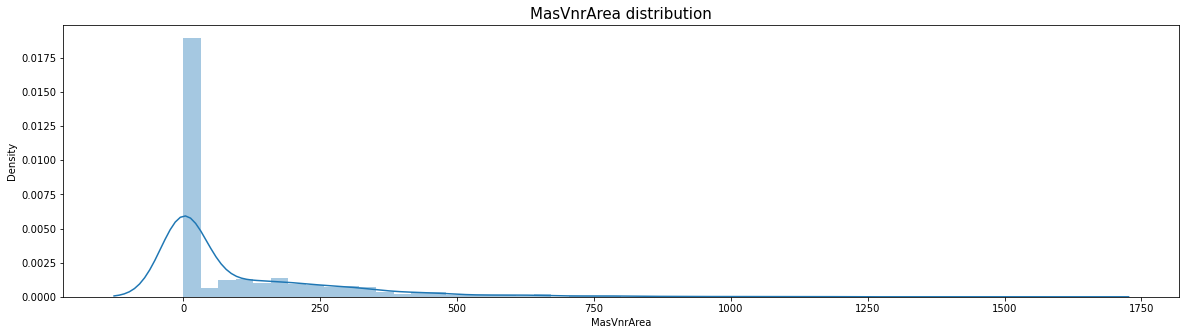

In [128]:
sns.distplot(train.MasVnrArea, kde=True)
plt.title("MasVnrArea distribution", fontsize=15)

<AxesSubplot:xlabel='MasVnrArea'>

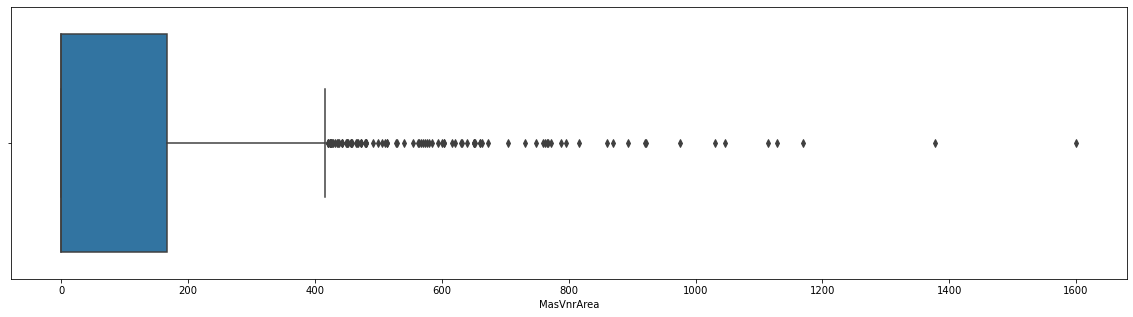

In [129]:
sns.boxplot(train.MasVnrArea)

In [130]:
train.MasVnrArea.mean()

103.68526170798899

In [131]:
train.MasVnrArea.median()

0.0

In [132]:
train.MasVnrArea.mode()

0    0.0
dtype: float64

In [133]:
train.MasVnrArea = train.MasVnrArea.fillna(train.MasVnrArea.median())

### ExterQual: Evaluates the quality of the material on the exterior

In [134]:
train.ExterQual.isnull().sum() * 100 / len(train)

0.0

In [135]:
train.ExterQual.dtype

dtype('O')

In [136]:
train.ExterQual.value_counts()

TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

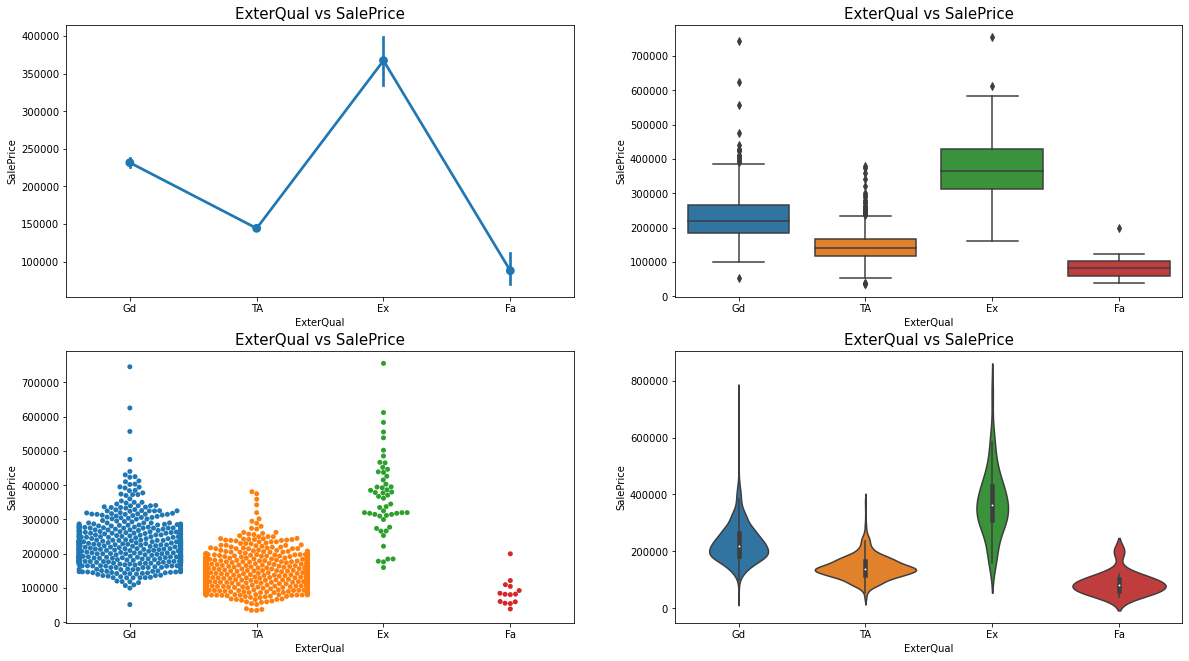

In [137]:
feature_name = 'ExterQual'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### ExterCond: Evaluates the present condition of the material on the exterior

In [138]:
train.ExterCond.isnull().sum() * 100 / len(train)

0.0

In [139]:
train.ExterCond.dtype

dtype('O')

In [140]:
train.ExterCond.value_counts()

TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

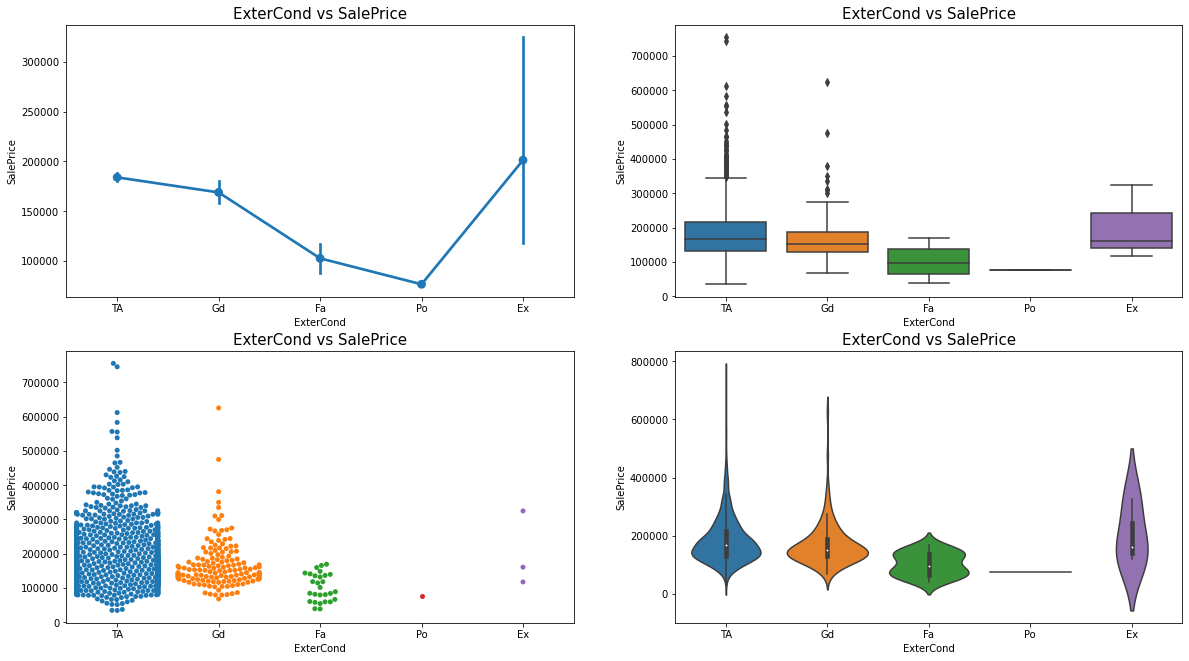

In [141]:
feature_name = 'ExterCond'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Foundation: Type of foundation

In [142]:
train.Foundation.isnull().sum() * 100 / len(train)

0.0

In [143]:
train.Foundation.dtype

dtype('O')

In [144]:
train.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

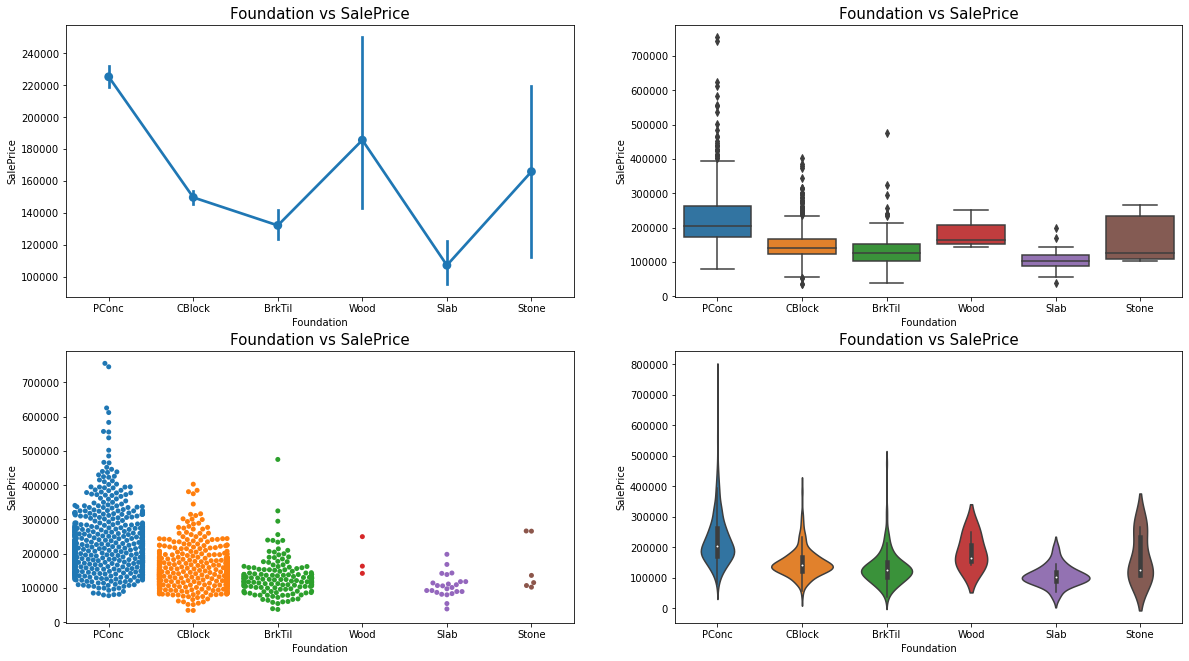

In [145]:
feature_name = 'Foundation'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### BsmtQual: Evaluates the height of the basement

In [146]:
train.BsmtQual.isnull().sum() * 100 / len(train)

2.5342465753424657

In [147]:
train.BsmtQual.dtype

dtype('O')

In [148]:
train.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

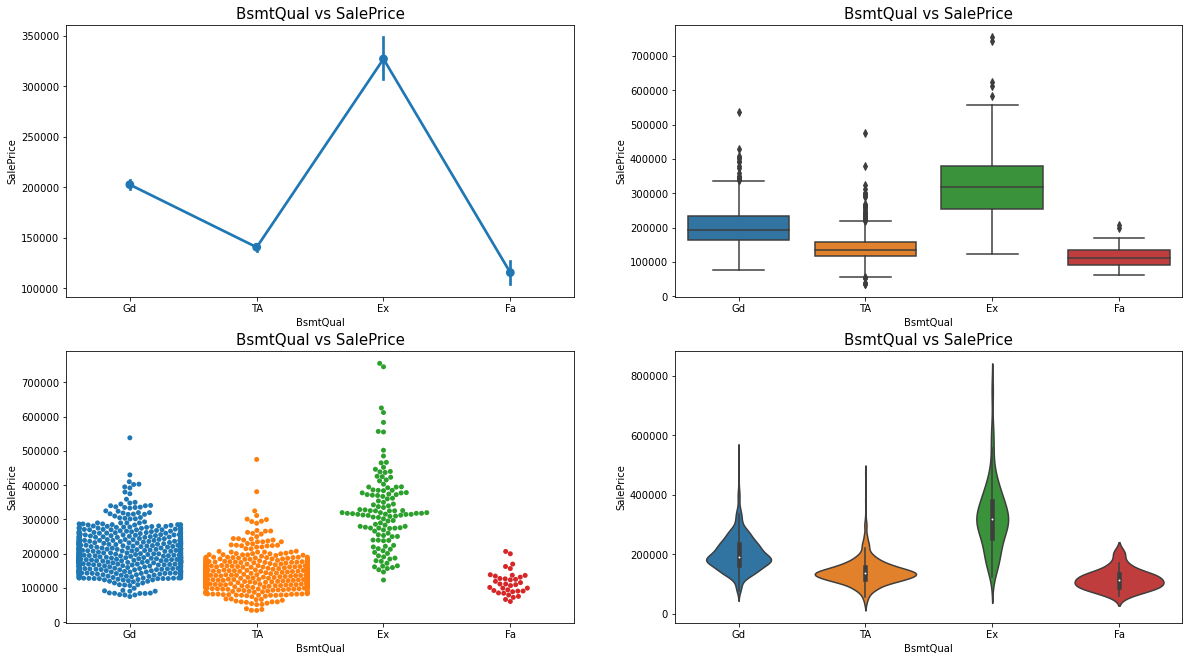

In [149]:
feature_name = 'BsmtQual'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


In [150]:
train.BsmtQual = train.BsmtQual.fillna(train.BsmtQual.mode()[0])

### BsmtCond: Evaluates the general condition of the basement

In [151]:
train.BsmtCond.isnull().sum() * 100 / len(train)

2.5342465753424657

In [152]:
train.BsmtCond.dtype

dtype('O')

In [153]:
train.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

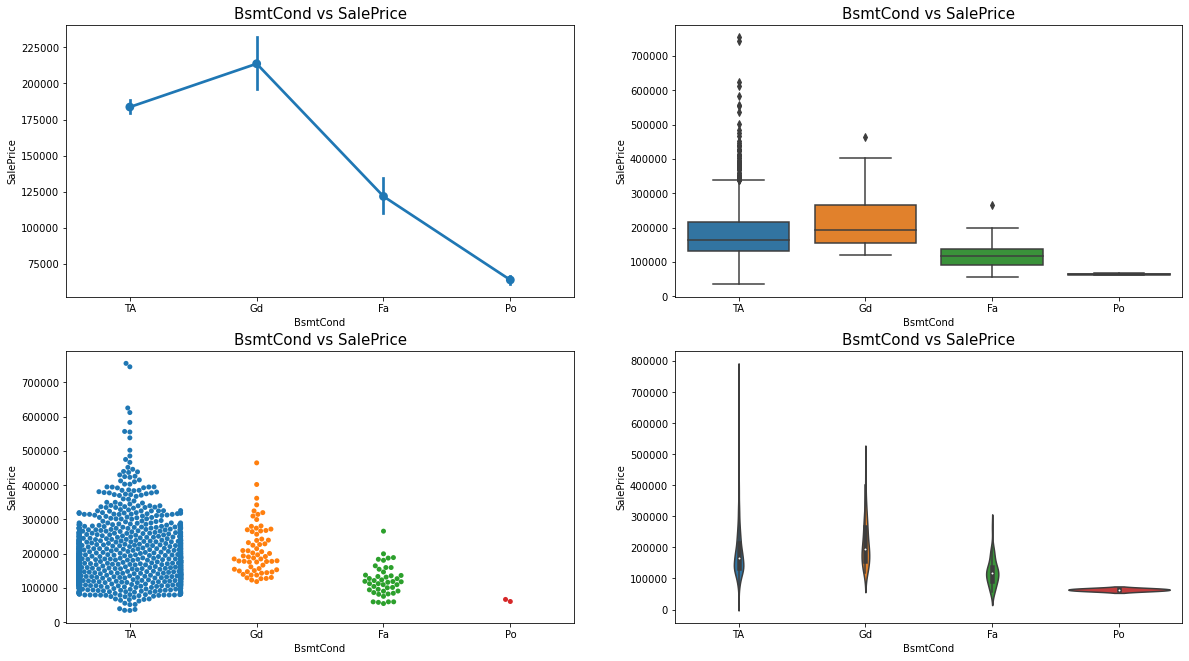

In [154]:
feature_name = 'BsmtCond'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


In [155]:
train.BsmtCond = train.BsmtCond.fillna(train.BsmtCond.mode()[0])

### BsmtExposure: Refers to walkout or garden level walls

In [156]:
train.BsmtExposure.isnull().sum() * 100 / len(train)

2.6027397260273974

In [157]:
train.BsmtExposure.dtype

dtype('O')

In [158]:
train.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

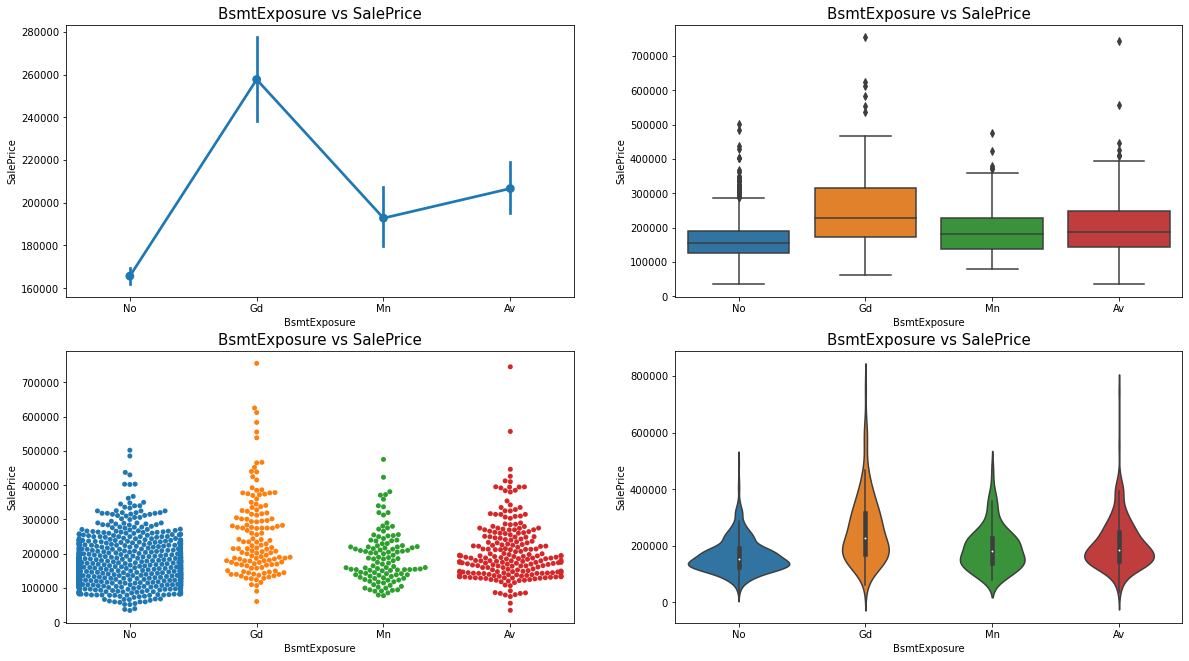

In [159]:
feature_name = 'BsmtExposure'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


In [160]:
train.BsmtExposure = train.BsmtExposure.fillna(train.BsmtExposure.mode()[0])

### BsmtFinType1: Rating of basement finished area

In [161]:
train.BsmtFinType1.isnull().sum() * 100 / len(train)

2.5342465753424657

In [162]:
train.BsmtFinType1.dtype

dtype('O')

In [163]:
train.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

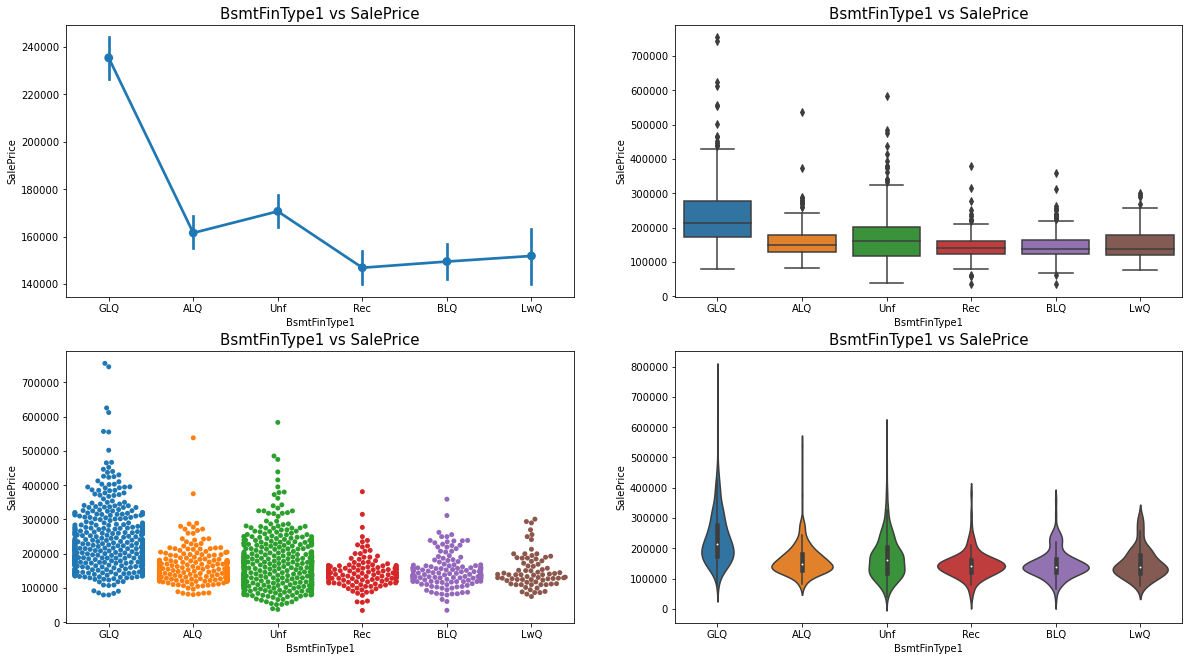

In [164]:
feature_name = 'BsmtFinType1'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


In [165]:
train.BsmtFinType1 = train.BsmtFinType1.fillna(train.BsmtFinType1.mode()[0])

### BsmtFinSF1: Type 1 finished square feet

In [166]:
train.BsmtFinSF1.isnull().sum() * 100 / len(train)

0.0

In [167]:
train.BsmtFinSF1.dtype

dtype('int64')

Text(0.5, 1.0, 'BsmtFinSF1 vs SalePrice')

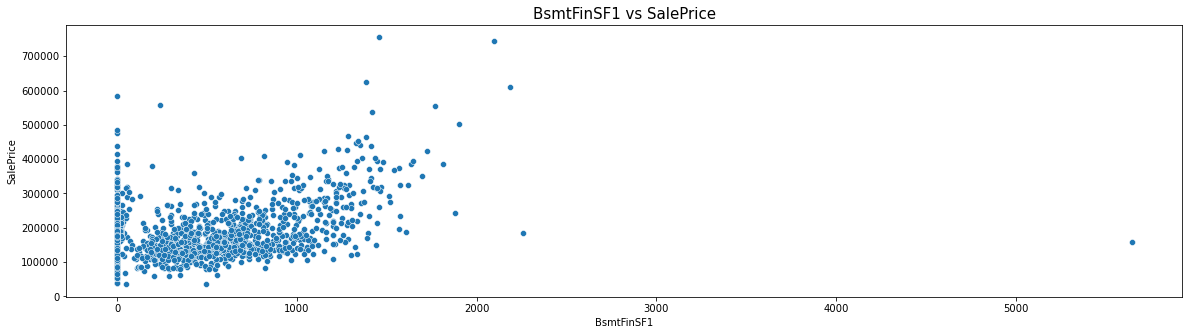

In [168]:
feature_name = "BsmtFinSF1"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

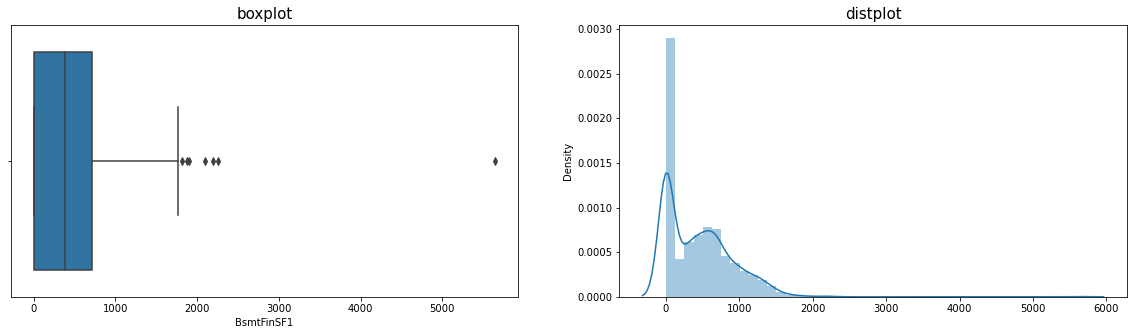

In [169]:
feature_name = 'BsmtFinSF1'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


### BsmtFinType2: Rating of basement finished area (if multiple types)

In [170]:
train.BsmtFinType2.isnull().sum() * 100 / len(train)

2.6027397260273974

In [171]:
train.BsmtFinType2.dtype

dtype('O')

In [172]:
train.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

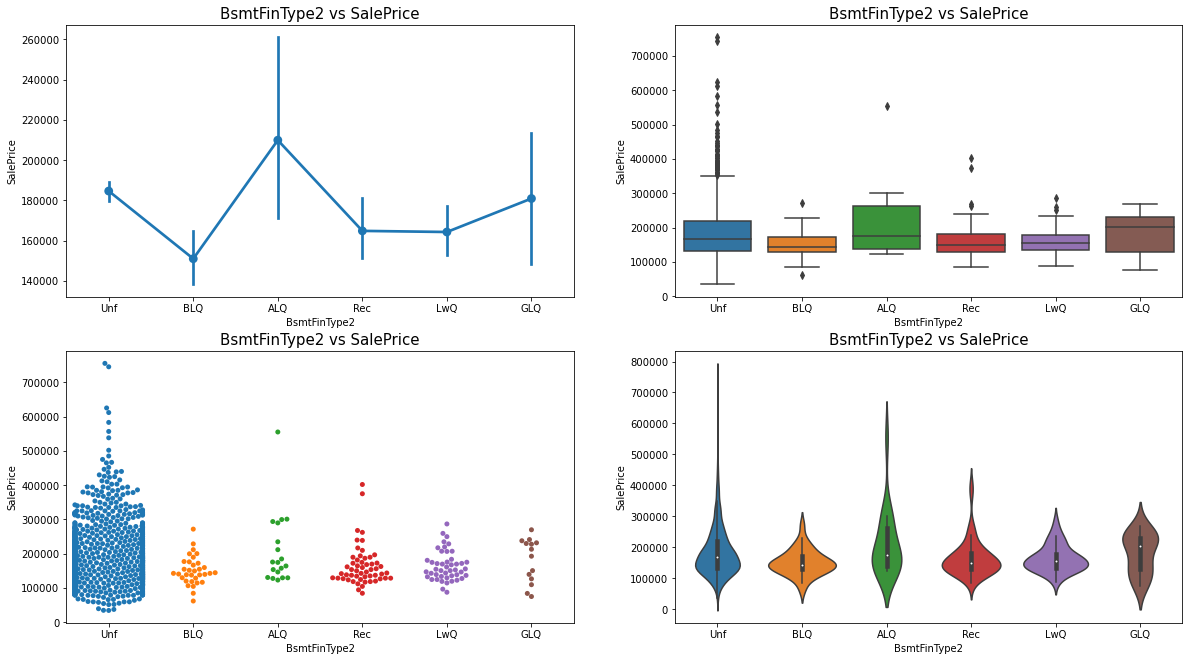

In [173]:
feature_name = 'BsmtFinType2'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


In [174]:
train.BsmtFinType2 = train.BsmtFinType2.fillna(train.BsmtFinType2.mode()[0])

### BsmtFinSF2: Type 2 finished square feet

In [175]:
train.BsmtFinSF2.isnull().sum() * 100 / len(train)

0.0

In [176]:
train.BsmtFinSF2.dtype

dtype('int64')

Text(0.5, 1.0, 'BsmtFinSF2 vs SalePrice')

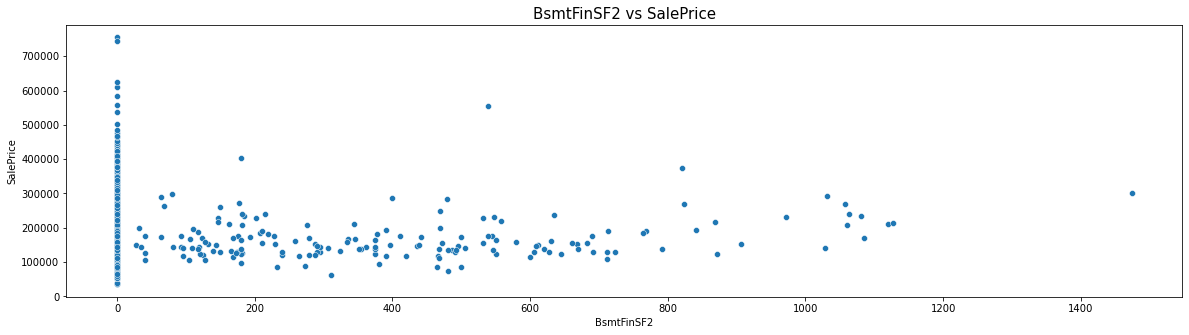

In [177]:
feature_name = "BsmtFinSF2"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

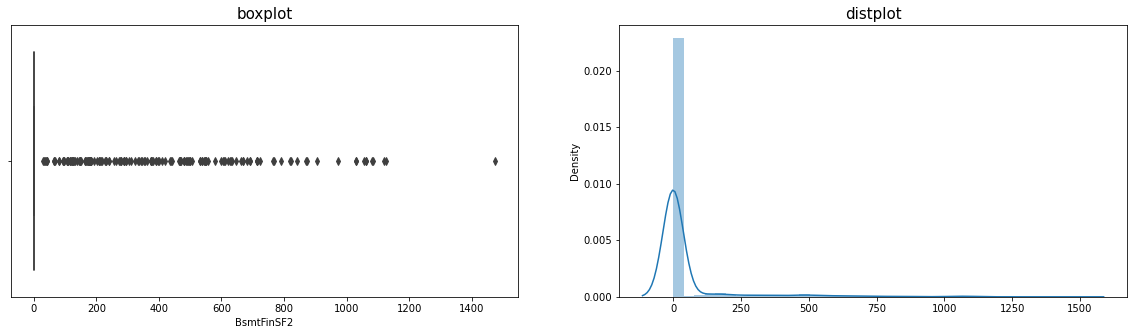

In [178]:
feature_name = 'BsmtFinSF2'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


### BsmtUnfSF: Unfinished square feet of basement area

In [179]:
train.BsmtUnfSF.isnull().sum() * 100 / len(train)

0.0

In [180]:
train.BsmtUnfSF.dtype

dtype('int64')

Text(0.5, 1.0, 'BsmtUnfSF vs SalePrice')

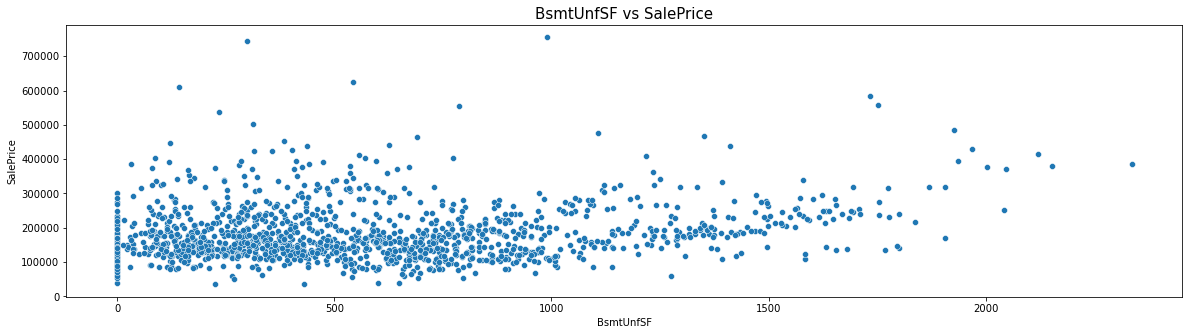

In [181]:
feature_name = "BsmtUnfSF"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

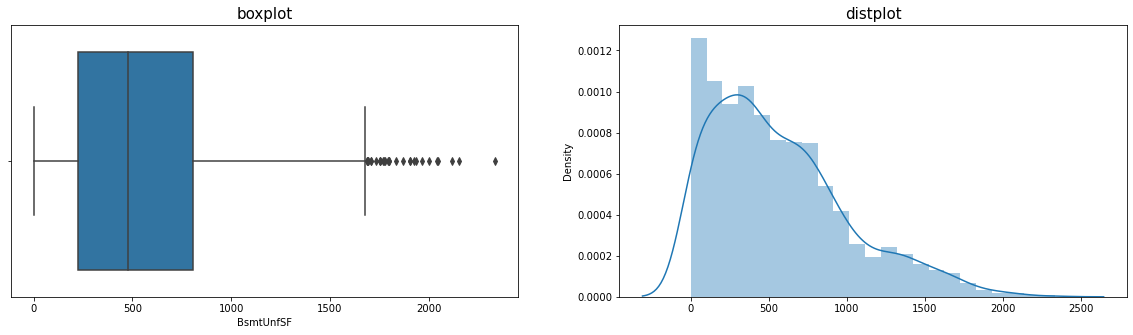

In [182]:
feature_name = 'BsmtUnfSF'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


### TotalBsmtSF: Total square feet of basement area

In [183]:
train.TotalBsmtSF.isnull().sum() * 100 / len(train)

0.0

In [184]:
train.TotalBsmtSF.dtype

dtype('int64')

Text(0.5, 1.0, 'TotalBsmtSF vs SalePrice')

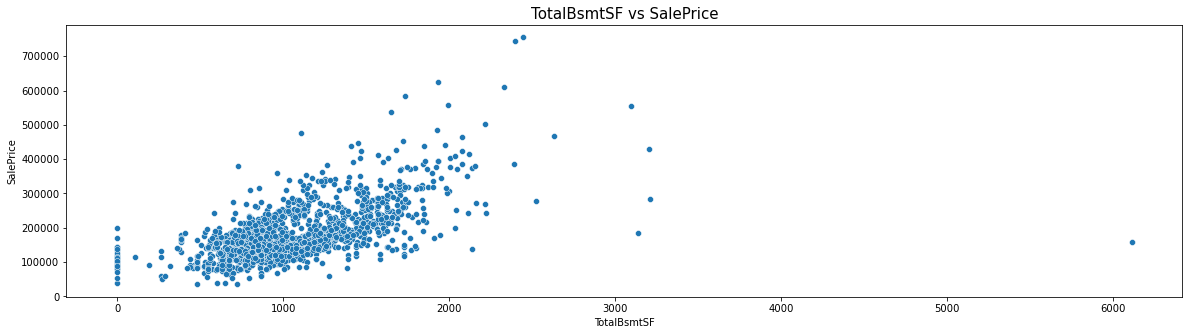

In [185]:
feature_name = "TotalBsmtSF"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

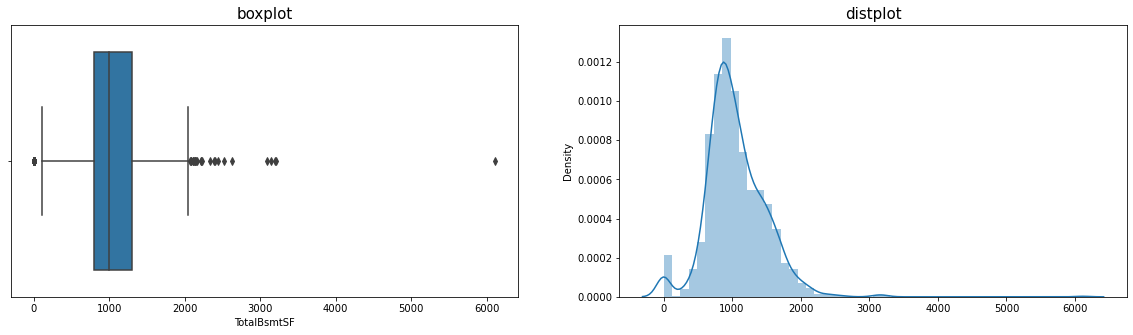

In [186]:
feature_name = 'TotalBsmtSF'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


### Heating: Type of heating

In [187]:
train.Heating.isnull().sum() * 100 / len(train)

0.0

In [188]:
train.Heating.dtype

dtype('O')

In [189]:
train.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

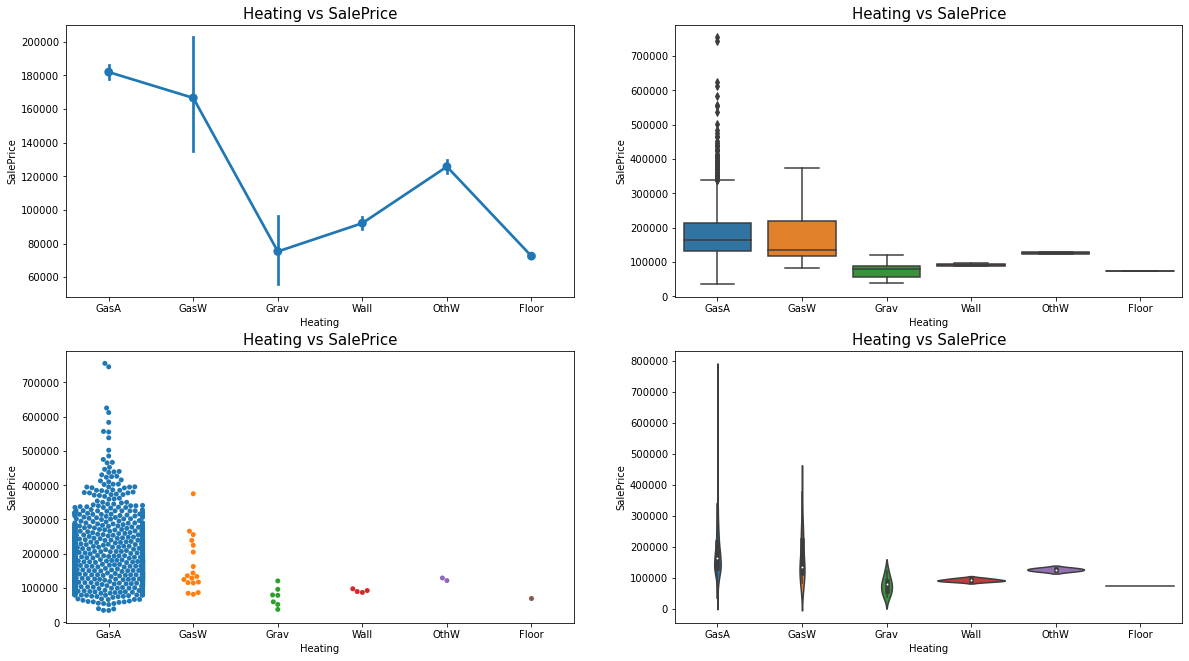

In [190]:
feature_name = 'Heating'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### HeatingQC: Heating quality and condition

In [191]:
train.HeatingQC.isnull().sum() * 100 / len(train)

0.0

In [192]:
train.HeatingQC.dtype

dtype('O')

In [193]:
train.HeatingQC.value_counts()

Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

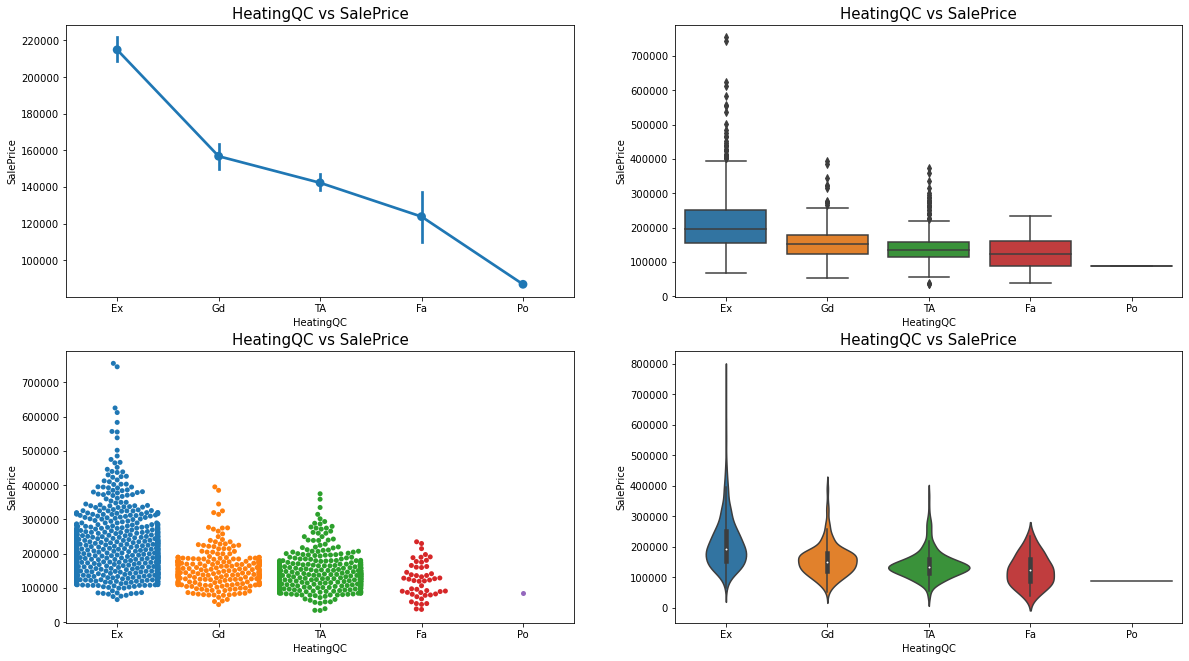

In [194]:
feature_name = 'HeatingQC'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### CentralAir: Central air conditioning

In [195]:
train.CentralAir.isnull().sum() * 100 / len(train)

0.0

In [196]:
train.CentralAir.dtype

dtype('O')

In [197]:
train.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

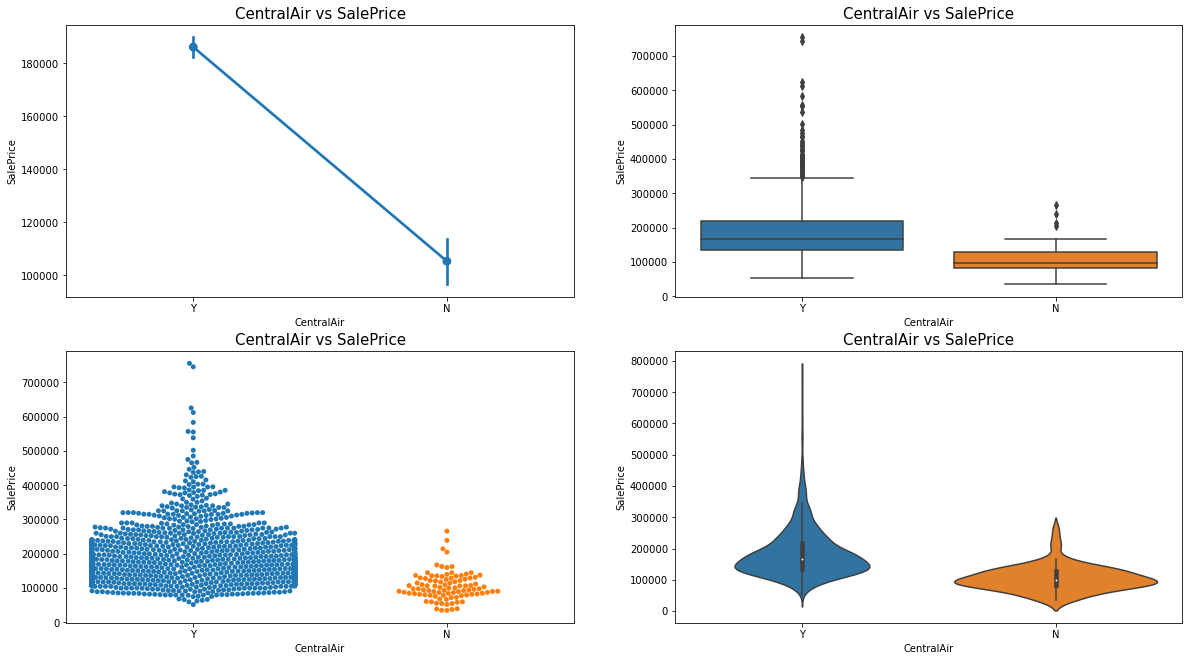

In [198]:
feature_name = 'CentralAir'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Electrical: Electrical system

In [199]:
train.Electrical.isnull().sum() * 100 / len(train)

0.0684931506849315

In [200]:
train.Electrical.dtype

dtype('O')

In [201]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

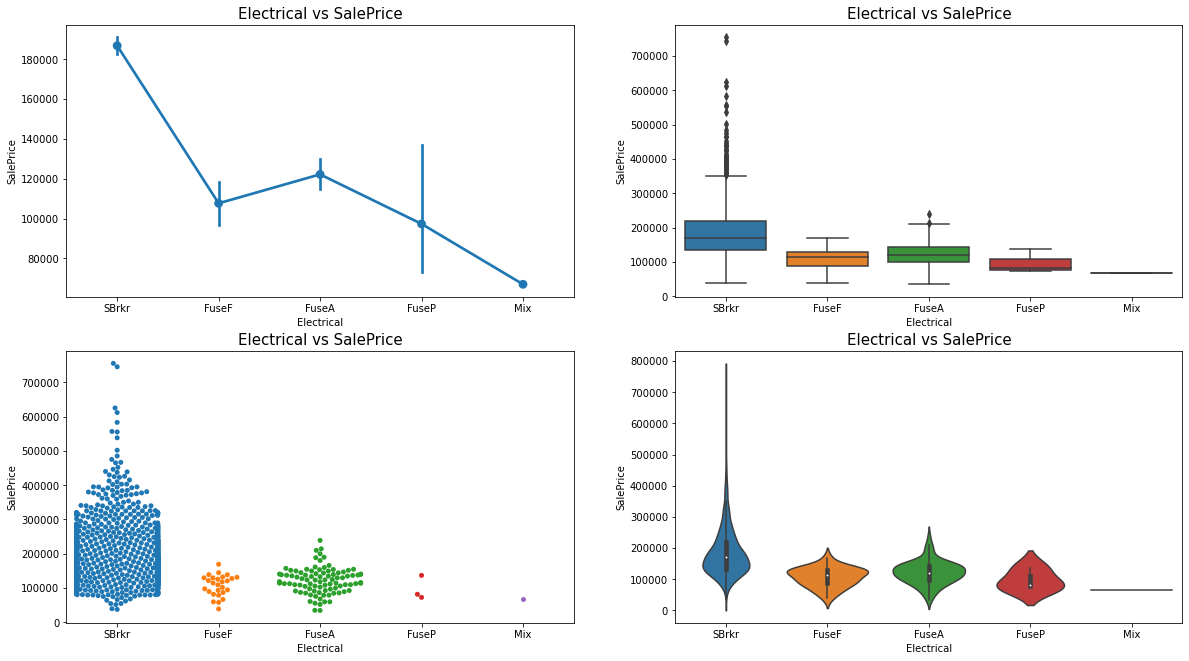

In [202]:
feature_name = 'Electrical'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


In [203]:
train.Electrical = train.Electrical.fillna(train.Electrical.mode()[0])

### 1stFlrSF: First Floor square feet

In [204]:
train['1stFlrSF'].isnull().sum() * 100 / len(train)

0.0

In [205]:
train['1stFlrSF'].dtype

dtype('int64')

Text(0.5, 1.0, '1stFlrSF vs SalePrice')

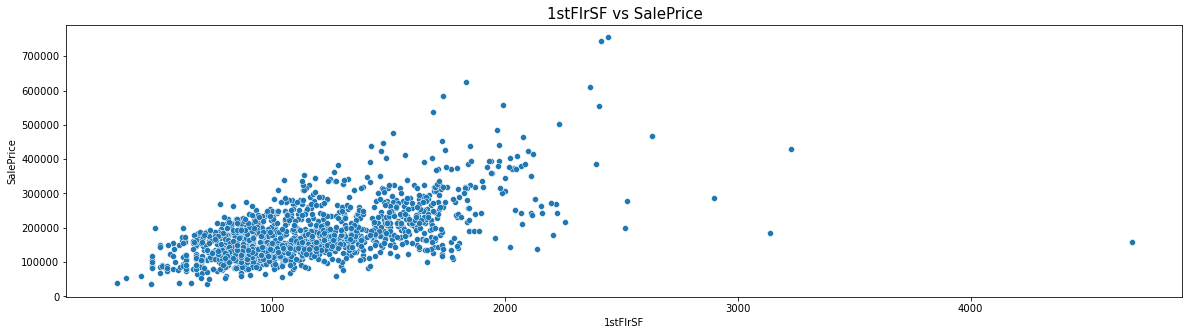

In [206]:
feature_name = "1stFlrSF"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

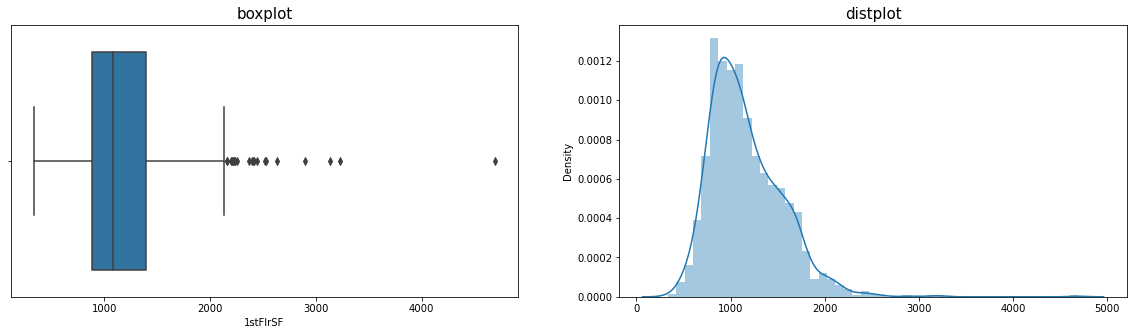

In [207]:
feature_name = '1stFlrSF'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


### 2ndFlrSF: Second floor square feet

In [208]:
train['2ndFlrSF'].isnull().sum() * 100 / len(train)

0.0

In [209]:
train['2ndFlrSF'].dtype

dtype('int64')

Text(0.5, 1.0, '2ndFlrSF vs SalePrice')

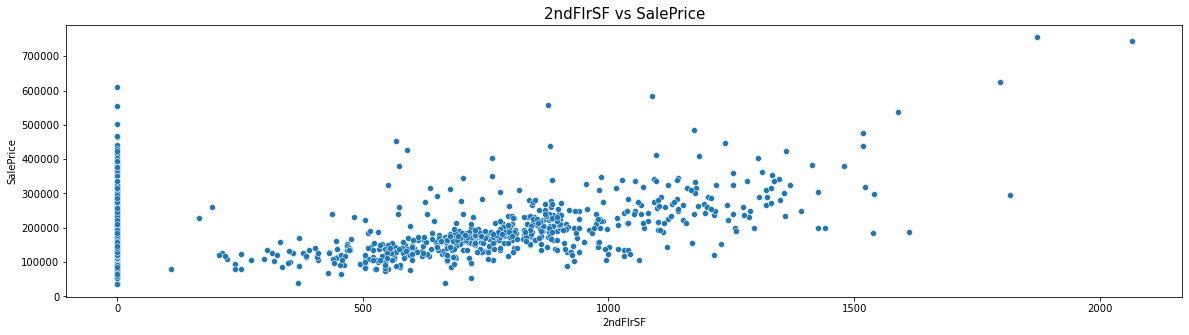

In [210]:
feature_name = "2ndFlrSF"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

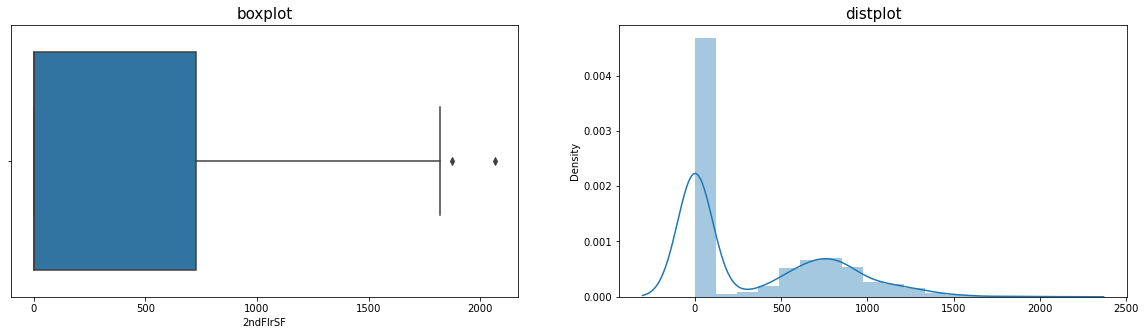

In [211]:
feature_name = '2ndFlrSF'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


### LowQualFinSF: Low quality finished square feet (all floors)

In [212]:
train.LowQualFinSF.isnull().sum() * 100 / len(train)

0.0

In [213]:
train.LowQualFinSF.dtype

dtype('int64')

Text(0.5, 1.0, 'LowQualFinSF vs SalePrice')

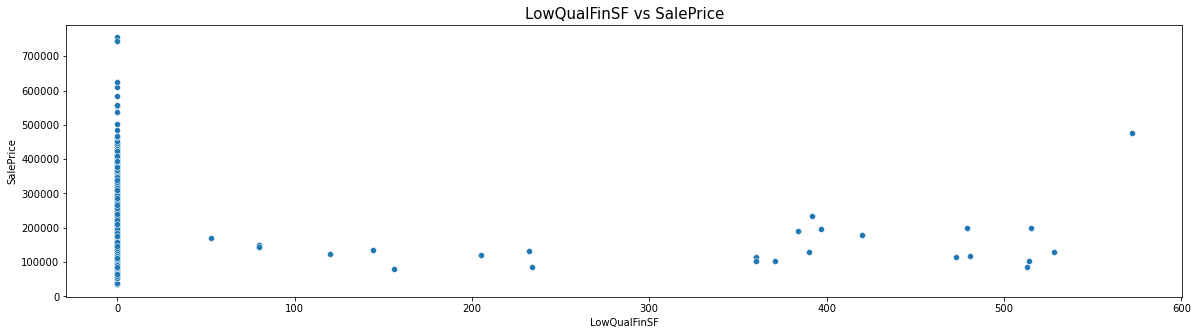

In [214]:
feature_name = "LowQualFinSF"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

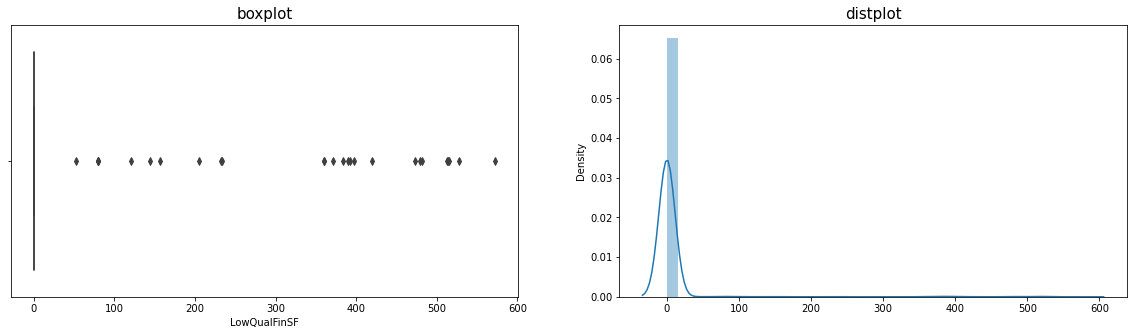

In [215]:
feature_name = 'LowQualFinSF'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


### GrLivArea: Above grade (ground) living area square feet

In [216]:
train.GrLivArea.isnull().sum() * 100 / len(train)

0.0

In [217]:
train.GrLivArea.dtype

dtype('int64')

Text(0.5, 1.0, 'GrLivArea vs SalePrice')

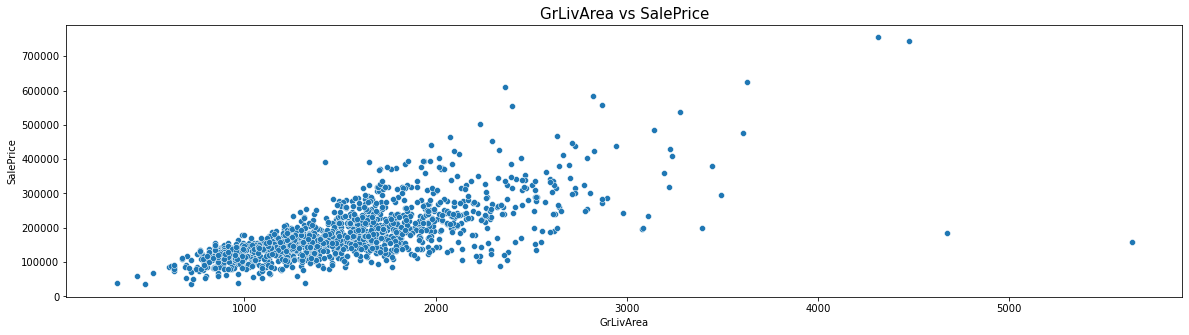

In [218]:
feature_name = "GrLivArea"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

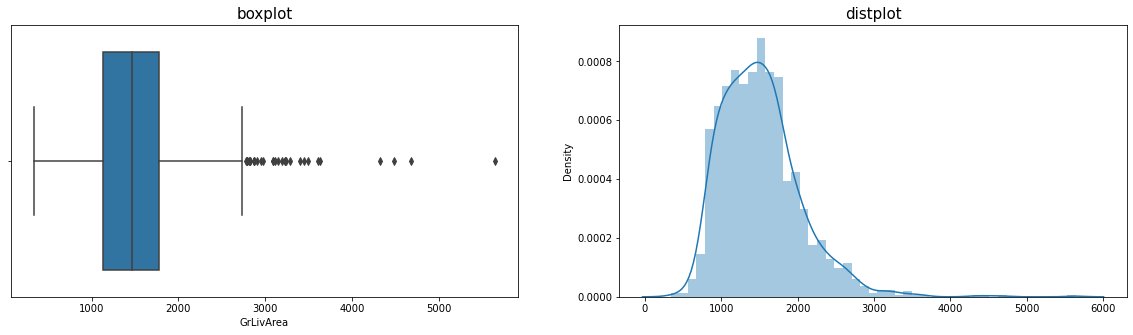

In [219]:
feature_name = 'GrLivArea'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


### BsmtFullBath: Basement full bathrooms

In [220]:
train.BsmtFullBath.isnull().sum() * 100 / len(train)

0.0

In [221]:
train.BsmtFullBath.dtype

dtype('int64')

Text(0.5, 1.0, 'BsmtFullBath vs SalePrice')

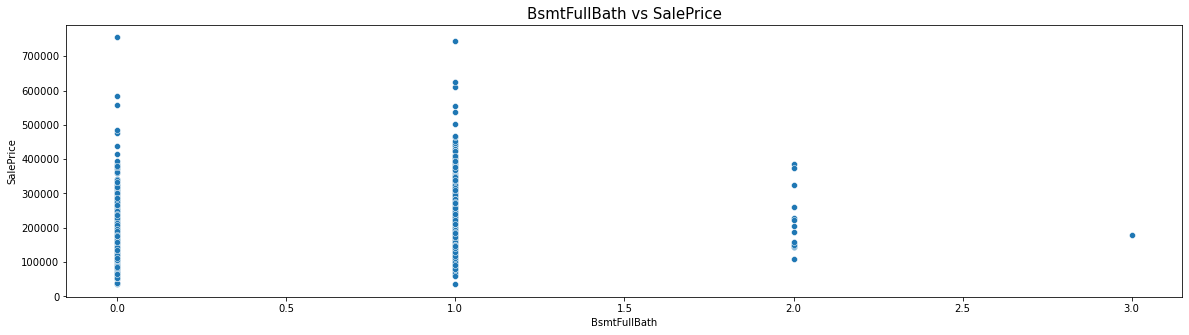

In [222]:
feature_name = "BsmtFullBath"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

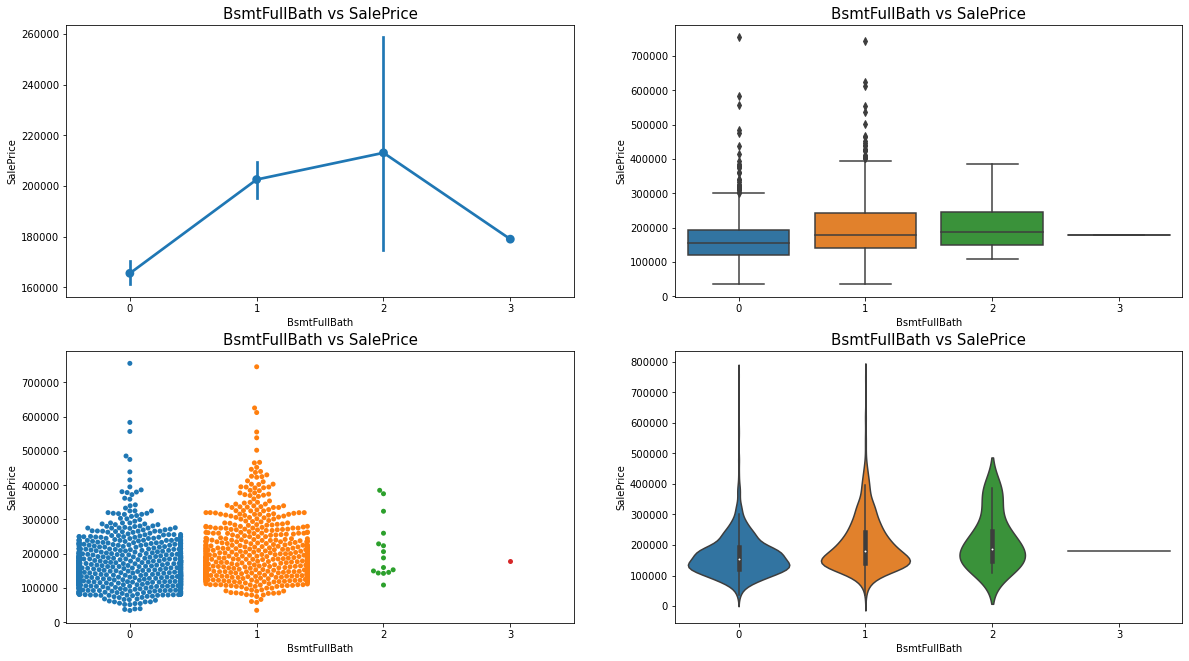

In [223]:
feature_name = 'BsmtFullBath'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### BsmtHalfBath: Basement half bathrooms

In [224]:
train.BsmtHalfBath.isnull().sum() * 100 / len(train)

0.0

In [225]:
train.BsmtHalfBath.dtype

dtype('int64')

Text(0.5, 1.0, 'BsmtHalfBath vs SalePrice')

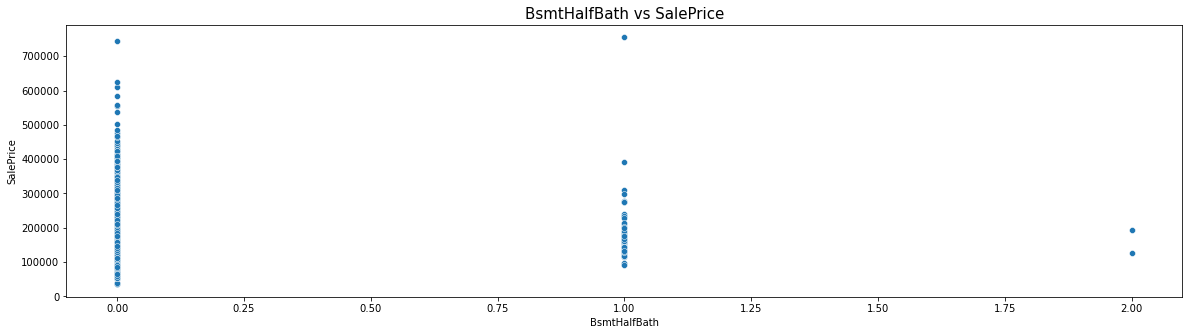

In [226]:
feature_name = "BsmtHalfBath"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

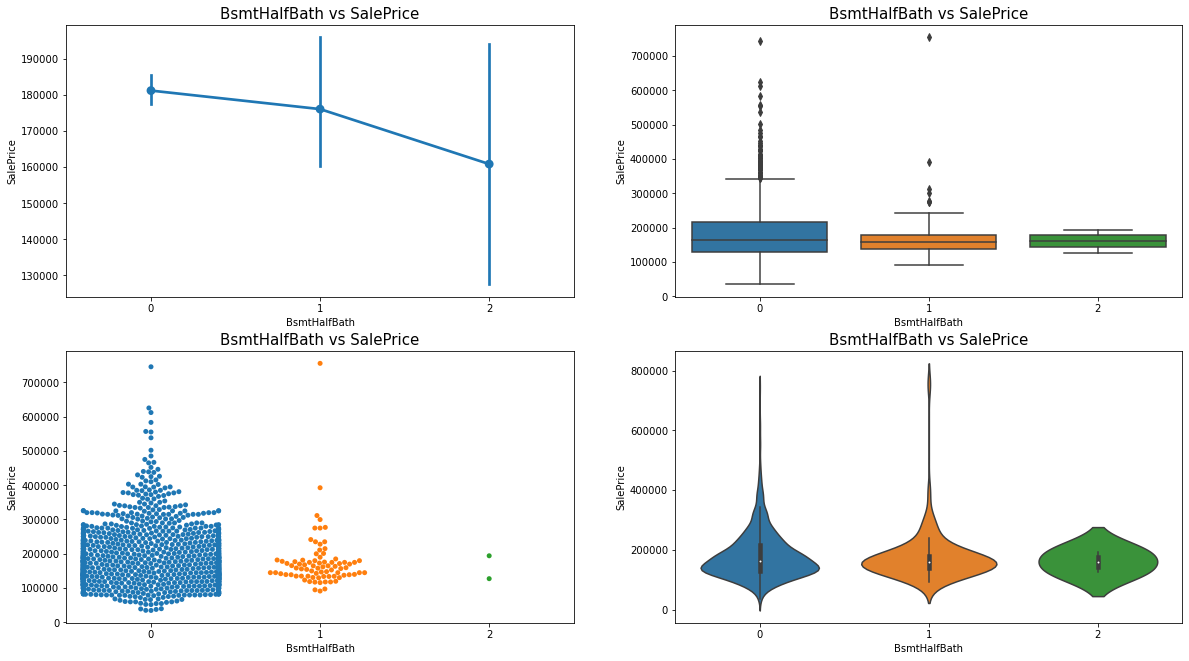

In [227]:
feature_name = 'BsmtHalfBath'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### FullBath: Full bathrooms above grade

In [228]:
train.FullBath.isnull().sum() * 100 / len(train)

0.0

In [229]:
train.FullBath.dtype

dtype('int64')

Text(0.5, 1.0, 'FullBath vs SalePrice')

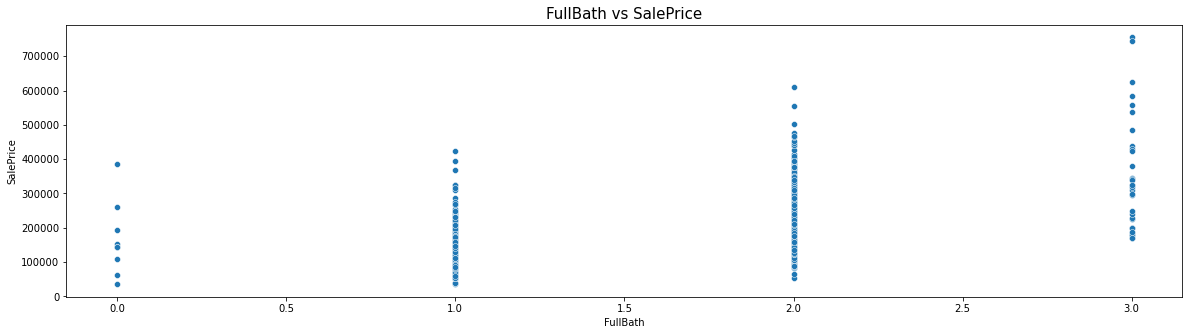

In [230]:
feature_name = "FullBath"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

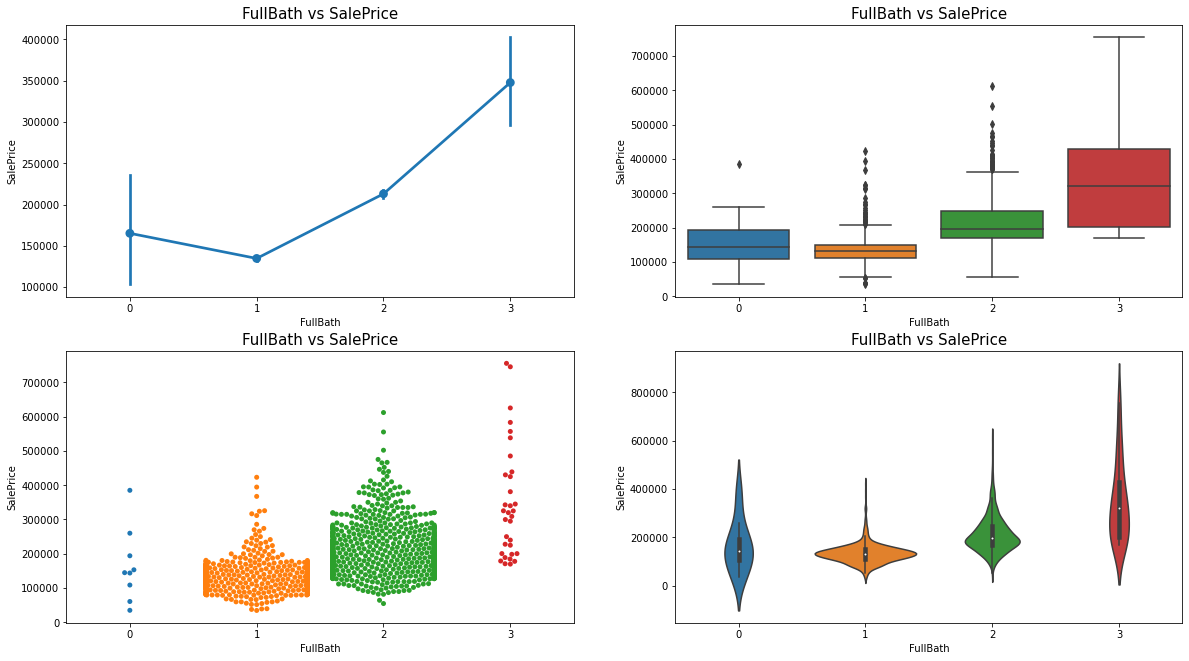

In [231]:
feature_name = 'FullBath'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### HalfBath: Half baths above grade

In [232]:
train.HalfBath.isnull().sum() * 100 / len(train)

0.0

In [233]:
train.HalfBath.dtype

dtype('int64')

Text(0.5, 1.0, 'HalfBath vs SalePrice')

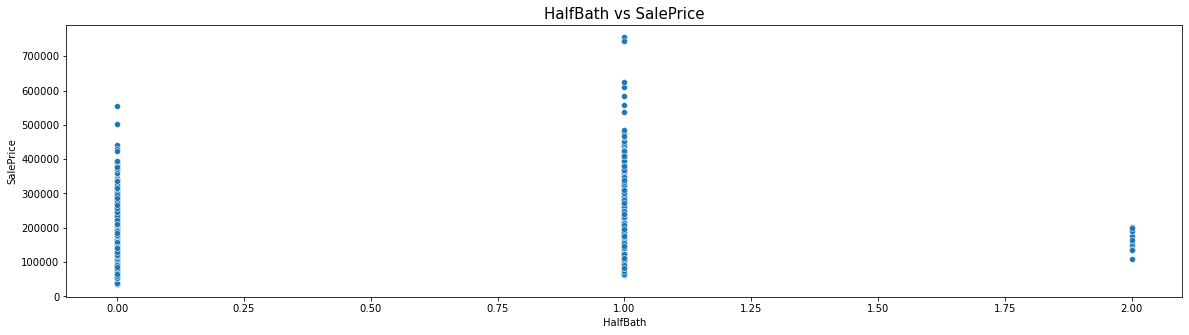

In [234]:
feature_name = "HalfBath"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

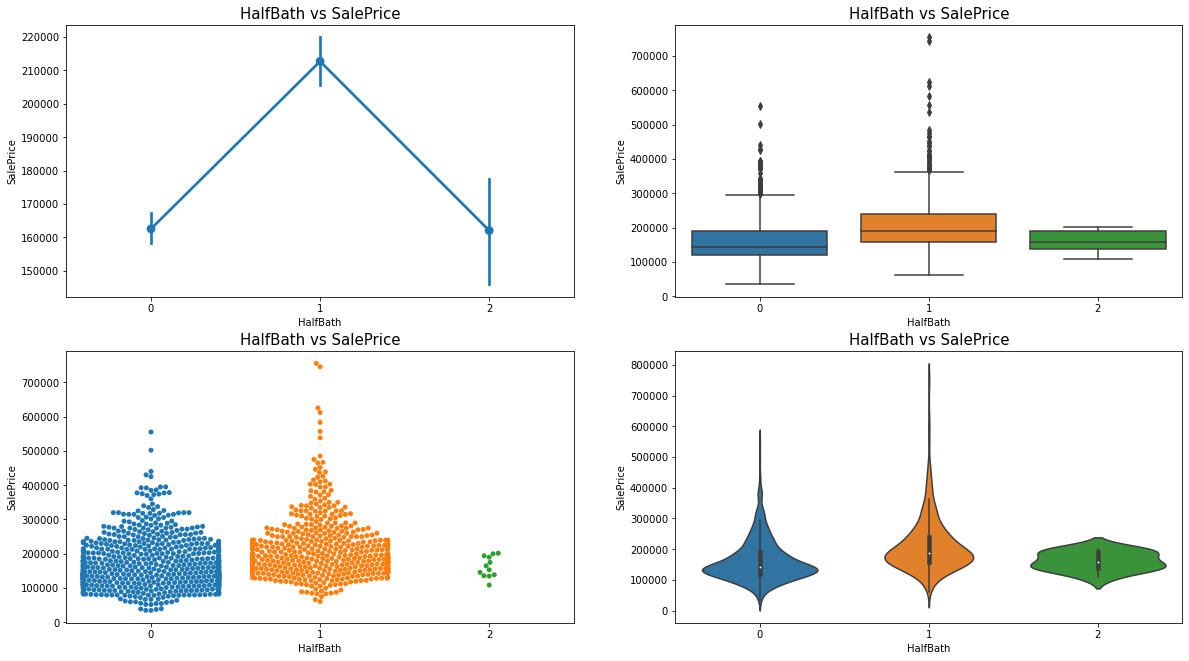

In [235]:
feature_name = 'HalfBath'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

In [236]:
train.BedroomAbvGr.isnull().sum() * 100 / len(train)

0.0

In [237]:
train.BedroomAbvGr.dtype

dtype('int64')

Text(0.5, 1.0, 'BedroomAbvGr vs SalePrice')

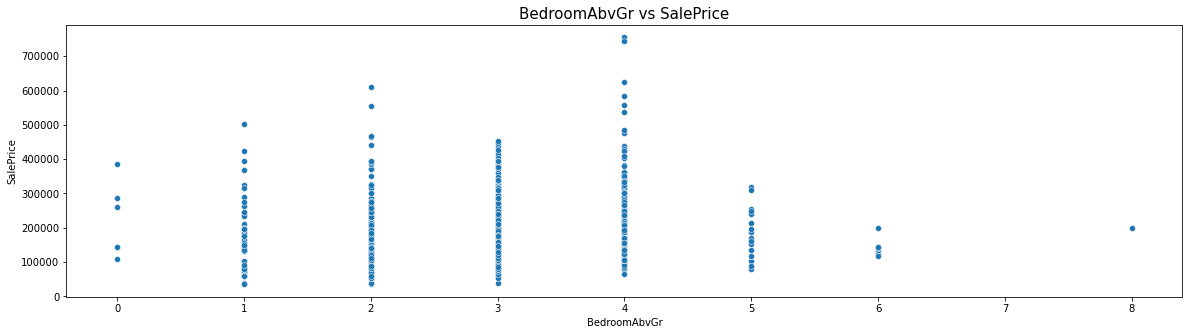

In [238]:
feature_name = "BedroomAbvGr"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

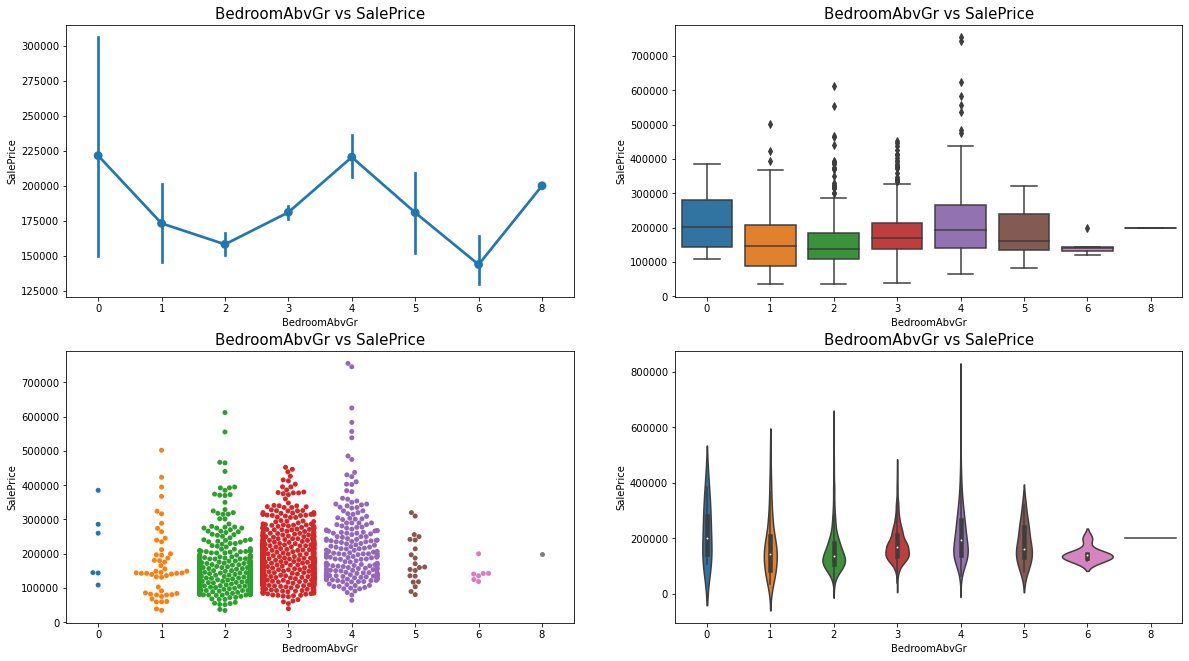

In [239]:
feature_name = 'BedroomAbvGr'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### KitchenAbvGr: Kitchens above grade

In [240]:
train.KitchenAbvGr.isnull().sum() * 100 / len(train)

0.0

In [241]:
train.KitchenAbvGr.dtype

dtype('int64')

Text(0.5, 1.0, 'KitchenAbvGr vs SalePrice')

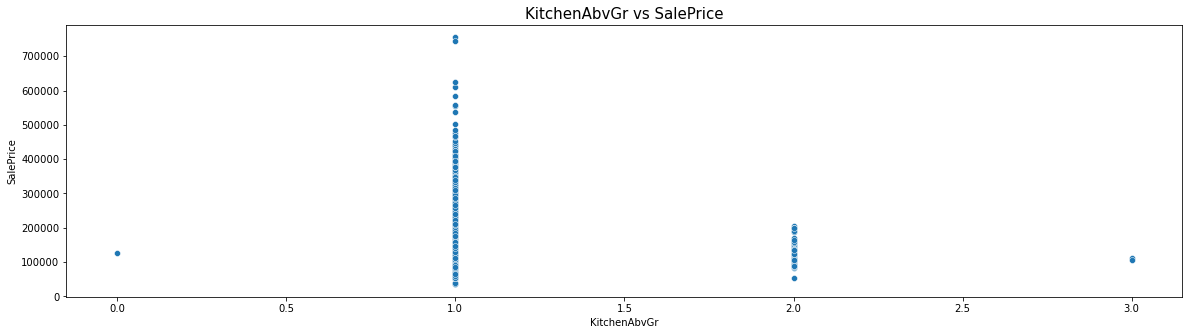

In [242]:
feature_name = "KitchenAbvGr"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

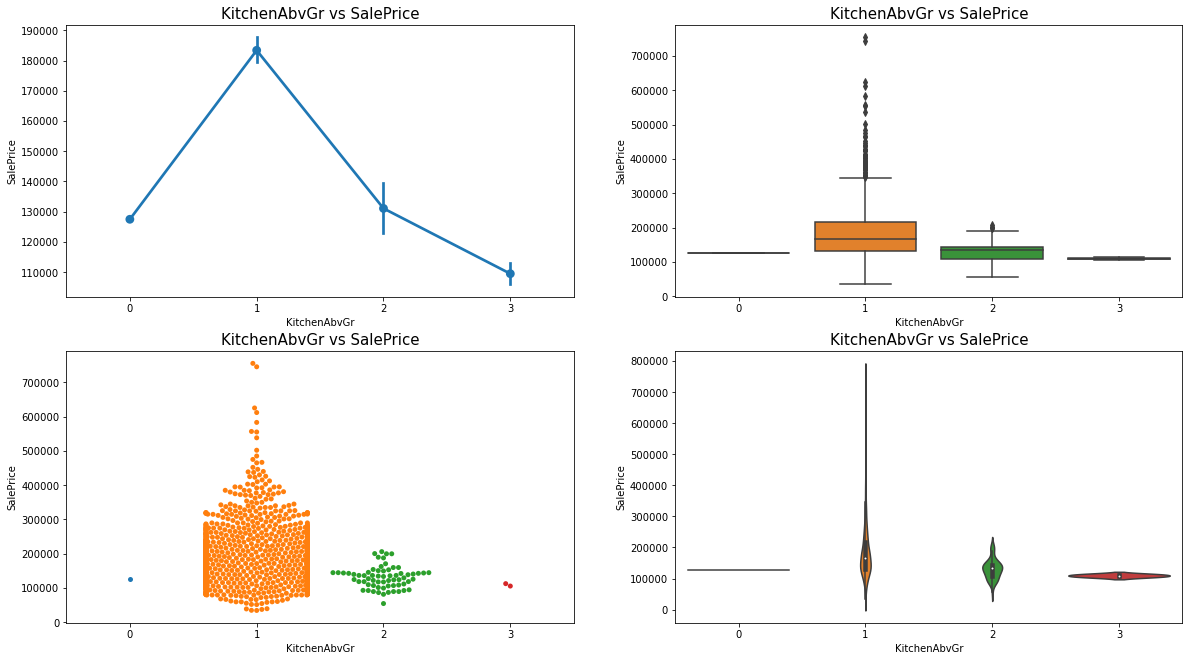

In [243]:
feature_name = 'KitchenAbvGr'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### KitchenQual: Kitchen quality

In [244]:
train.KitchenQual.isnull().sum() * 100 / len(train)

0.0

In [245]:
train.KitchenQual.dtype

dtype('O')

In [246]:
train.KitchenQual.value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

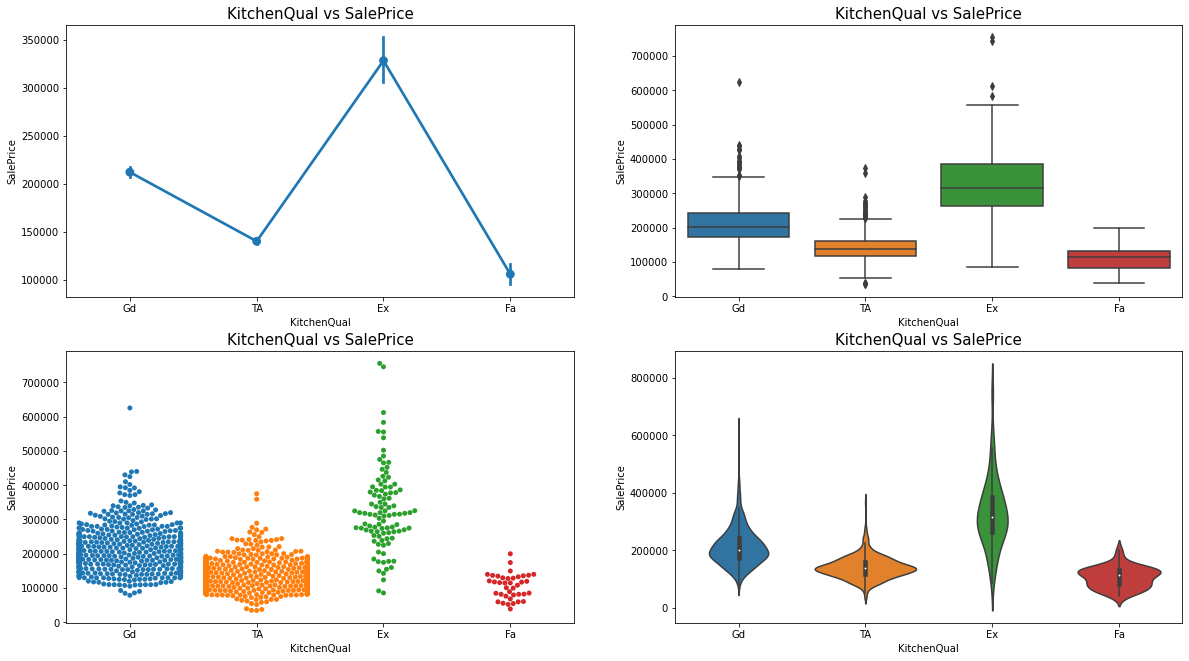

In [247]:
feature_name = 'KitchenQual'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [248]:
train.TotRmsAbvGrd.isnull().sum() * 100 / len(train)

0.0

In [249]:
train.TotRmsAbvGrd.dtype

dtype('int64')

Text(0.5, 1.0, 'TotRmsAbvGrd vs SalePrice')

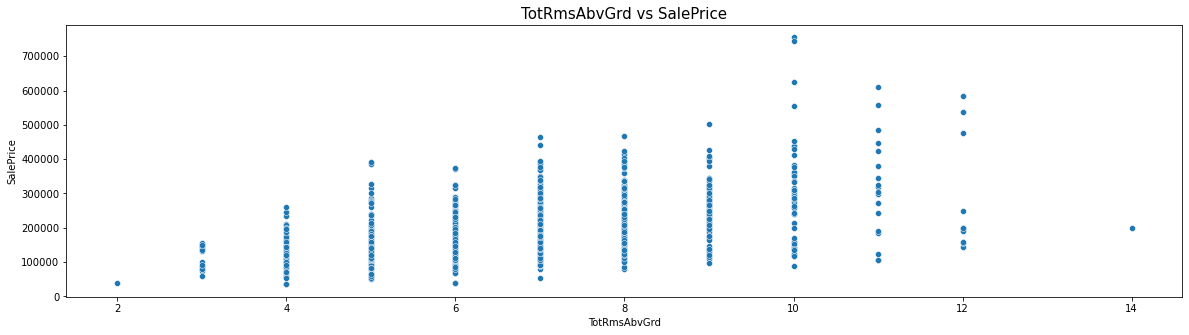

In [250]:
feature_name = "TotRmsAbvGrd"
sns.scatterplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

### Functional: Home functionality (Assume typical unless deductions are warranted)

In [251]:
train.Functional.isnull().sum() * 100 / len(train)

0.0

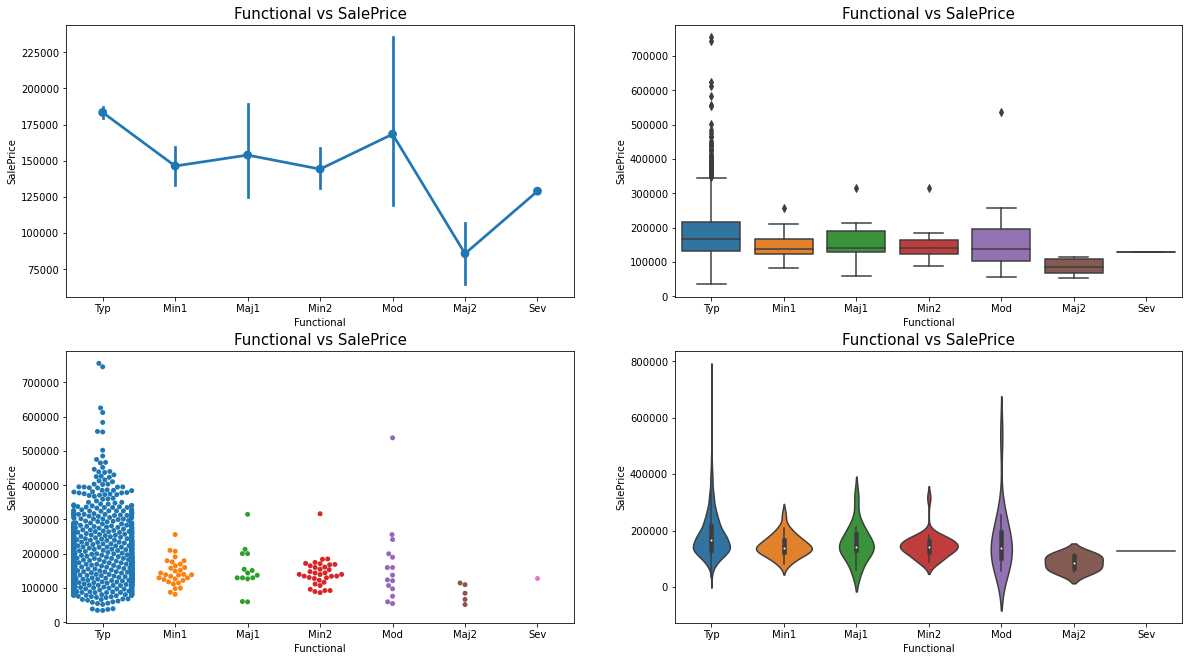

In [252]:
feature_name = 'Functional'

plt.figure(figsize=(20,11))

plt.subplot(2,2,1)
sns.pointplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,3)
sns.swarmplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.subplot(2,2,4)
sns.violinplot(x=train[feature_name],y=train.SalePrice, data=train)
plt.title(f"{feature_name} vs SalePrice", fontsize=15)

plt.show()


### Fireplaces: Number of fireplaces

In [253]:
train.Fireplaces.isnull().sum() * 100 / len(train)

0.0

### FireplaceQu: Fireplace quality

In [254]:
train.FireplaceQu.isnull().sum() * 100 / len(train)

47.26027397260274

In [255]:
train.FireplaceQu.dtype

dtype('O')

In [256]:
train.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [257]:
train.FireplaceQu = train.FireplaceQu.fillna(train.FireplaceQu.mode()[0])

### GarageType: Garage location

In [258]:
train.GarageType.isnull().sum() * 100 / len(train)

5.5479452054794525

In [259]:
train.GarageType.dtype

dtype('O')

In [260]:
train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [261]:
train.GarageType = train.GarageType.fillna(train.GarageType.mode()[0])

### GarageYrBlt: Year garage was built

In [262]:
train.GarageYrBlt.isnull().sum() * 100 / len(train)

5.5479452054794525

In [263]:
train.GarageYrBlt.dtype

dtype('float64')

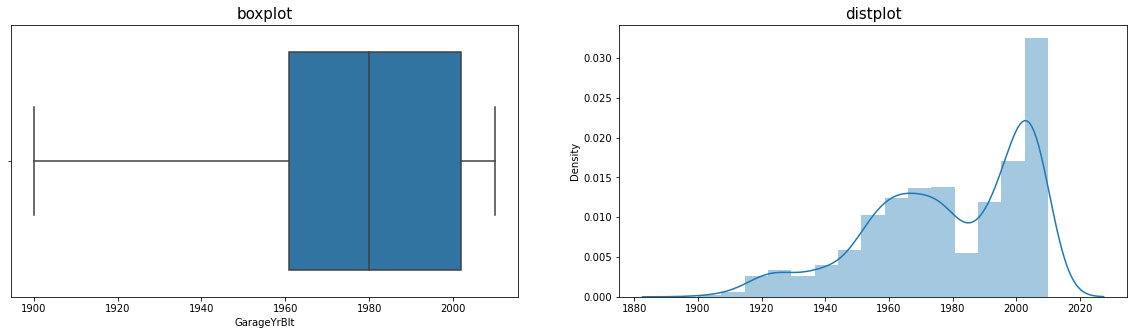

In [264]:
feature_name = 'GarageYrBlt'

plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(x=train[feature_name])
plt.title(f"boxplot", fontsize=15)

plt.subplot(1,2,2)
sns.distplot(x=train[feature_name])
plt.title(f"distplot", fontsize=15)


plt.show()


In [265]:
train.GarageYrBlt = train.GarageYrBlt.fillna(train.GarageYrBlt.median())

### GarageFinish: Interior finish of the garage

In [266]:
train.GarageFinish.isnull().sum() * 100 / len(train)

5.5479452054794525

In [267]:
train.GarageFinish.dtype

dtype('O')

In [268]:
train.GarageFinish = train.GarageFinish.fillna(train.GarageFinish.mode()[0])

### GarageCars: Size of garage in car capacity

In [269]:
train.GarageCars.isnull().sum() * 100 / len(train)

0.0

### GarageArea: Size of garage in square feet

In [270]:
train.GarageArea.isnull().sum() * 100 / len(train)

0.0

### GarageQual: Garage quality

In [271]:
train.GarageQual.isnull().sum() * 100 / len(train)

5.5479452054794525

In [272]:
train.GarageQual.dtype

dtype('O')

In [273]:
train.GarageQual = train.GarageQual.fillna(train.GarageQual.mode()[0])

### GarageCond: Garage condition

In [274]:
train.GarageCond.isnull().sum() * 100 / len(train)

5.5479452054794525

In [275]:
train.GarageCond.dtype

dtype('O')

In [276]:
train.GarageCond = train.GarageCond.fillna(train.GarageCond.mode()[0])

### PavedDrive: Paved driveway

In [277]:
train.PavedDrive.isnull().sum() * 100 / len(train)

0.0

### WoodDeckSF: Wood deck area in square feet

In [278]:
train.WoodDeckSF.isnull().sum() * 100 / len(train)

0.0

### OpenPorchSF: Open porch area in square feet

In [279]:
train.OpenPorchSF.isnull().sum() * 100 / len(train)

0.0

### EnclosedPorch: Enclosed porch area in square feet

In [280]:
train.EnclosedPorch.isnull().sum() * 100 / len(train)

0.0

### 3SsnPorch: Three season porch area in square feet

In [281]:
train['3SsnPorch'].isnull().sum() * 100 / len(train)

0.0

### ScreenPorch: Screen porch area in square feet

In [282]:
train.ScreenPorch.isnull().sum() * 100 / len(train)

0.0

### PoolArea: Pool area in square feet

In [283]:
train.PoolArea.isnull().sum() * 100 / len(train)

0.0

### PoolQC: Pool quality

In [284]:
train.PoolQC.isnull().sum() * 100 / len(train)

99.52054794520548

In [285]:
train.drop('PoolQC', axis=1, inplace=True)

### Fence: Fence quality

In [286]:
train.Fence.isnull().sum() * 100 / len(train)

80.75342465753425

In [287]:
train.drop('Fence', axis=1, inplace=True)

### MiscFeature: Miscellaneous feature not covered in other categories

In [288]:
train.MiscFeature.isnull().sum() * 100 / len(train)

96.3013698630137

In [289]:
train.drop('MiscFeature', axis=1, inplace=True)

### MiscVal: $Value of miscellaneous feature

In [290]:
train.MiscVal.isnull().sum() * 100 / len(train)

0.0

### MoSold: Month Sold (MM)

In [291]:
train.MiscVal.isnull().sum() * 100 / len(train)

0.0

### YrSold: Year Sold (YYYY)

In [292]:
train.YrSold.isnull().sum() * 100 / len(train)

0.0

### SaleType: Type of sale

In [293]:
train.SaleType.isnull().sum() * 100 / len(train)

0.0

### SaleCondition: Condition of sale

In [294]:
train.SaleCondition.isnull().sum() * 100 / len(train)

0.0

In [297]:
num_df = train.select_dtypes(include=np.number)

<AxesSubplot:>

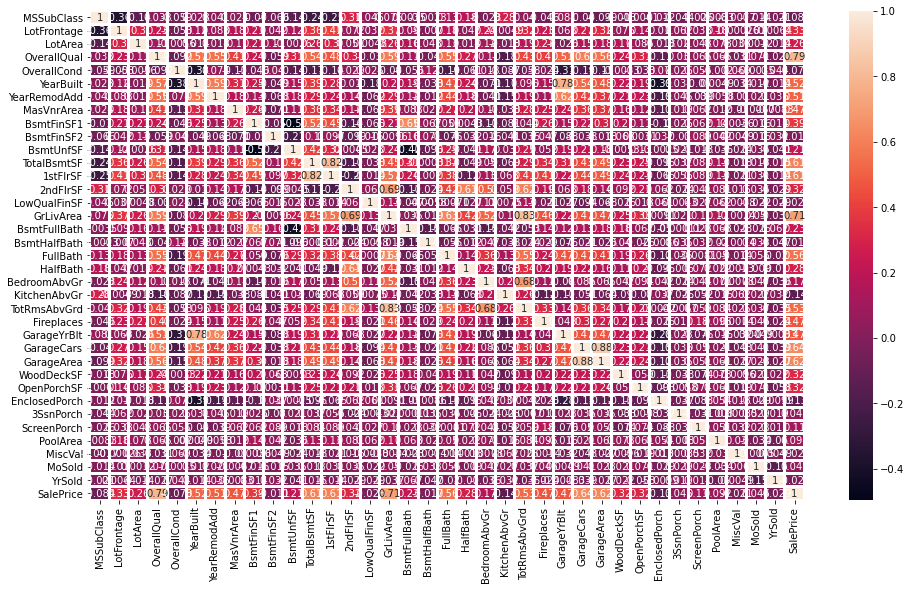

In [298]:
corr_df=num_df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr_df, annot=True, linewidths=2)

In [299]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [302]:
correlation(num_df, 0.75)

{'1stFlrSF', 'GarageArea', 'GarageYrBlt', 'SalePrice', 'TotRmsAbvGrd'}

In [ ]:
train.isnull().sum().sum()

In [ ]:
train.shape

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test.shape

In [ ]:
test.isnull().sum().sum()

In [ ]:
categorical_col= train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
train.select_dtypes(include=np.number)

In [ ]:
train.select_dtypes(include=np.number).columns.tolist()

In [ ]:
## handle categorial features (one_hot encoding)

In [ ]:
def category_onehot_multcols(multcolumns, final_df):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
main_df=train.copy()

In [ ]:
# comcat train with train  row-wise

In [ ]:
final_df=pd.concat([train,test],axis=0)

In [ ]:
final_df.shape

In [ ]:
final_df=category_onehot_multcols(categorical_col, final_df)

In [ ]:
final_df.shape

In [ ]:
final_df.head()

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [ ]:
final_df.shape

In [ ]:
train=final_df.iloc[:1460,:]
test=final_df.iloc[1460:,:]

In [ ]:
train.shape

In [ ]:
test.shape

In [ ]:
test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
X_train=train.drop(['SalePrice'],axis=1)
y_train=train['SalePrice']

In [ ]:
## modeltraining

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
y_pred=regressor.predict(test)

In [ ]:
pred=pd.DataFrame(y_pred)

In [ ]:
##Create Sample Submission file and Submit using ANN

sub_df=train = pd.read_csv("D:\\Data_sets\\house-prices-advanced-regression-techniques\\sample_submission.csv")
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)